In [12]:
import pandas as pd
import math
import numpy as np

In [13]:
DATA_DIR = '/Users/39388/Downloads/'

In [14]:
all_data = pd.read_csv(DATA_DIR + 'all_matches_modified.csv')

In [15]:
all_data.columns

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'is_four', 'is_six'],
      dtype='object')

In [16]:
all_data.head()
all_data.apply(pd.to_numeric, errors='ignore')
all_data['player_dismissed'].apply(lambda x: float(x) if str(x).isdigit() else x)
all_data['is_wide'] = all_data['wides']>0

all_data["total_runs"] = all_data['runs_off_bat'].astype(int) + all_data["extras"]
all_data["runs_conceded_bowler"] = all_data['runs_off_bat'].astype(int) + all_data["wides"] + all_data["noballs"]+ all_data["penalty"]

all_data_2020 = all_data[all_data.season.isin(['2019/2020','2020/21'])]
all_data.loc[all_data['start_date'].str.contains('2020'), 'season'] = '2020'
all_data_2020 = all_data[all_data.season.isin(['2020'])]

all_data_2021 = all_data[all_data.season.isin(['2019/2020','2020/21','2021/22'])]
all_data.loc[all_data['start_date'].str.contains('2021'), 'season'] = '2021'
all_data_2021 = all_data[all_data.season.isin(['2021'])]

all_data_2022 = all_data[all_data.season.isin(['2019/2020','2020/21','2021/22','2022'])]
all_data.loc[all_data['start_date'].str.contains('2022'), 'season'] = '2022'
all_data_2022 = all_data[all_data.season.isin(['2022'])]


all_data_2022


,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,...,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_four,is_six,is_wide,total_runs,runs_conceded_bowler
41827,41827,1293000,2022,2022-01-27,"National Stadium, Karachi",1,0.1,Karachi Kings,Multan Sultans,Sharjeel Khan,...,0.0,0,0,0.0,0.0,False,False,False,1,1.0
41828,41828,1293000,2022,2022-01-27,"National Stadium, Karachi",1,0.2,Karachi Kings,Multan Sultans,Babar Azam,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0
41829,41829,1293000,2022,2022-01-27,"National Stadium, Karachi",1,0.3,Karachi Kings,Multan Sultans,Babar Azam,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0
41830,41830,1293000,2022,2022-01-27,"National Stadium, Karachi",1,0.4,Karachi Kings,Multan Sultans,Babar Azam,...,0.0,0,0,0.0,0.0,False,False,False,1,1.0
41831,41831,1293000,2022,2022-01-27,"National Stadium, Karachi",1,0.5,Karachi Kings,Multan Sultans,Sharjeel Khan,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50092,50092,1293033,2022,2022-02-27,"Gaddafi Stadium, Lahore",2,18.5,Multan Sultans,Lahore Qalandars,Rumman Raees,...,0.0,bowled,Rumman Raees,0.0,0.0,False,False,False,0,0.0
50093,50093,1293033,2022,2022-02-27,"Gaddafi Stadium, Lahore",2,18.6,Multan Sultans,Lahore Qalandars,Shahnawaz Dhani,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0
50094,50094,1293033,2022,2022-02-27,"Gaddafi Stadium, Lahore",2,19.1,Multan Sultans,Lahore Qalandars,Imran Tahir,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0
50095,50095,1293033,2022,2022-02-27,"Gaddafi Stadium, Lahore",2,19.2,Multan Sultans,Lahore Qalandars,Imran Tahir,...,0.0,0,0,0.0,0.0,False,False,False,0,0.0


In [17]:
all_data_2020.to_csv("all_data_20202.csv",index=False)

all_data_2021.to_csv('all_data_2021.csv',index=False)

all_data_2022.to_csv('all_data_2022.csv',index=False)

In [18]:
cwd()

NameError: name 'cwd' is not defined

### Total Runs 2020

In [19]:
batsman_runs = all_data_2020.groupby(["striker"])["runs_off_bat"].sum()

In [20]:
batsman_runs = batsman_runs.reset_index( name = 'batsman_runs').sort_values( by = 'batsman_runs',ascending = False) 

In [21]:
batsman_runs.head()

,striker,batsman_runs
15,Babar Azam,473
32,Fakhar Zaman,325
57,Mohammad Hafeez,312
14,BR Dunk,300
19,CA Lynn,284


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

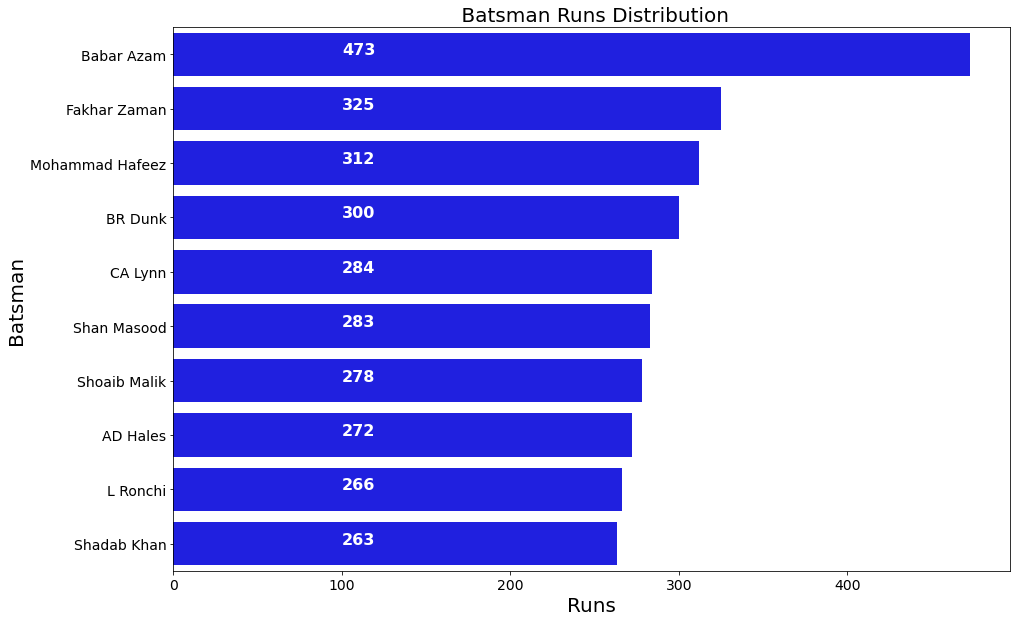

In [23]:
xlabel_name = "Runs"
ylabel_name = "Batsman"
title_name = " Batsman Runs Distribution"

sns.barplot( x = "batsman_runs" , y = "striker" , data = batsman_runs.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_runs.head(10)["batsman_runs"].values):
    ax.text(100, i, v,fontsize=16,color='white',weight='bold')

In [24]:


batsman_team = all_data_2020.groupby(['striker'])["batting_team"].unique()\
.reset_index(name = 'batting_team').sort_values( by = 'batting_team',ascending = False)

batsman_team['team'] = [''.join(map(str, l)) for l in batsman_team['batting_team']]
batsman_team.drop("batting_team",axis=1,inplace = True)
batsman_team


,striker,team
48,Khurram Manzoor,Quetta Gladiators
92,TS Mills,Quetta Gladiators
62,Mohammad Nawaz (3),Quetta Gladiators
33,Fawad Ahmed,Quetta Gladiators
77,SR Watson,Quetta Gladiators
...,...,...
18,CA Ingram,Islamabad United
7,Akif Javed,Islamabad United
103,Zafar Gohar,Islamabad United
4,Ahmed Safi Abdullah,Islamabad United


# Matches

In [25]:
batsman_matches = all_data_2020[["striker","match_id"]]

In [26]:
batsman_matches_count = batsman_matches.drop_duplicates().groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_matches')

In [27]:
batsman_matches_count

,striker,batsman_matches
0,A Lyth,2
1,AD Hales,7
2,Abdul Nasir,1
3,Adil Amin,1
4,Ahmed Safi Abdullah,2
...,...,...
101,Waqas Maqsood,1
102,Yasir Shah,1
103,Zafar Gohar,1
104,Zahid Mahmood,1


In [28]:
batsman_all_stats = batsman_runs.merge(batsman_matches_count)

In [29]:
batsman_all_stats


,striker,batsman_runs,batsman_matches
0,Babar Azam,473,10
1,Fakhar Zaman,325,12
2,Mohammad Hafeez,312,12
3,BR Dunk,300,10
4,CA Lynn,284,8
...,...,...,...
101,Faizan Khan,0,1
102,Junaid Khan,0,1
103,Mohammad Rizwan,0,1
104,Mohammad Mohsin,0,1


# Player Outs

In [30]:


batsman_outs = all_data_2020['player_dismissed'].value_counts(dropna=True)\
.reset_index(name = 'player_out').sort_values( by = 'player_out',ascending = False)
batsman_outs.rename(columns={'index':'striker'},inplace=True)
batsman_outs.drop(index=batsman_outs.index[0], 
        axis=0, 
        inplace=True)

batsman_outs

,striker,player_out
1,Fakhar Zaman,12
2,Sharjeel Khan,11
3,Zeeshan Ashraf,11
4,Shan Masood,10
5,SR Watson,9
...,...,...
70,Mohammad Imran,1
69,GC Viljoen,1
67,Mohammad Ilyas,1
66,Khurram Manzoor,1


# Fours

In [31]:
all_data_four_runs = all_data_2020[(all_data_2020["is_four"] == True)]

In [32]:
batsman_fours = all_data_four_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_fours').sort_values( by = 'batsman_fours',ascending = False) 

In [33]:
batsman_fours

,striker,batsman_fours
11,Babar Azam,55
25,Fakhar Zaman,36
14,CA Lynn,32
37,Kamran Akmal,31
41,L Ronchi,31
...,...,...
55,SE Rutherford,1
45,Mohammad Amir Khan,1
75,Zafar Gohar,1
47,Mohammad Ilyas,1


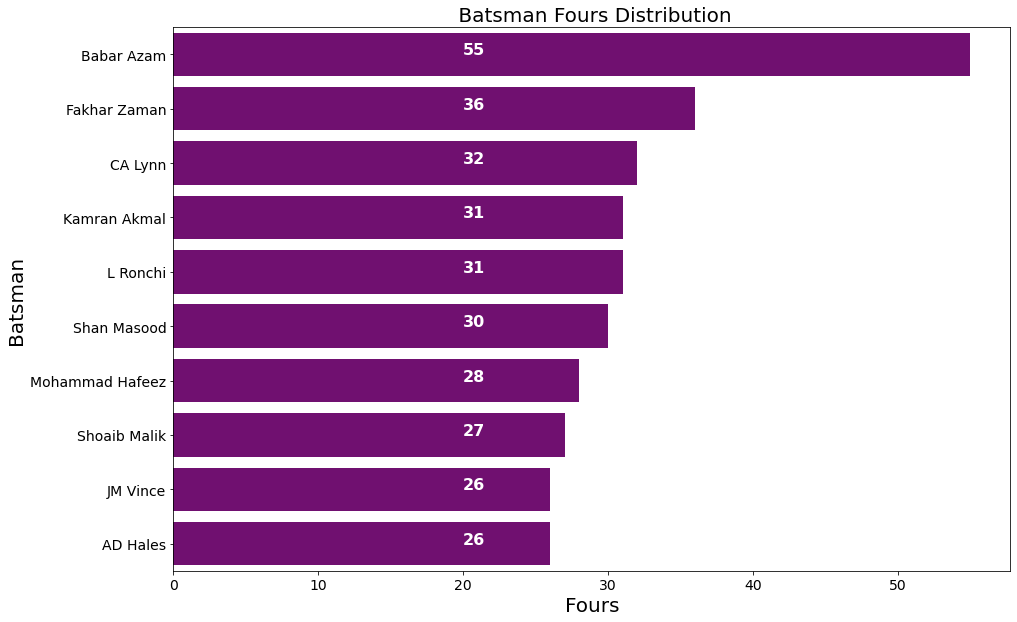

In [34]:
xlabel_name = "Fours"
ylabel_name = "Batsman"
title_name = " Batsman Fours Distribution"

sns.barplot( x = "batsman_fours" , y = "striker" , data = batsman_fours.head(10), color = "purple")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_fours.head(10)["batsman_fours"].values):
    ax.text(20, i, v,fontsize=16,color='white',weight='bold')

# Six

In [35]:
all_data_six_runs = all_data_2020[(all_data_2020["is_six"] == True)]

In [36]:
batsman_six = all_data_six_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_six').sort_values( by = 'batsman_six',ascending = False) 

In [37]:
batsman_six

,striker,batsman_six
8,BR Dunk,23
12,CA Lynn,16
59,Sharjeel Khan,16
53,SR Watson,16
55,Shadab Khan,15
...,...,...
36,LA Dawson,1
32,Khurram Manzoor,1
20,Dilbar Hussain,1
21,F du Plessis,1


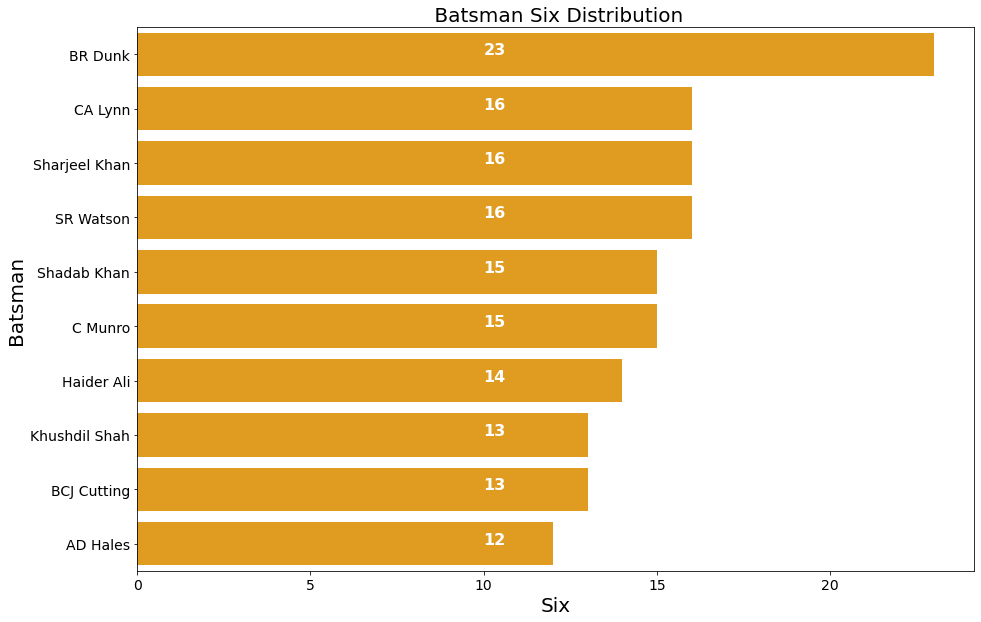

In [38]:
xlabel_name = "Six"
ylabel_name = "Batsman"
title_name = " Batsman Six Distribution"

sns.barplot( x = "batsman_six" , y = "striker" , data = batsman_six.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_six.head(10)["batsman_six"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

In [39]:
batsman_all_stats = batsman_all_stats.merge(batsman_fours,how = "left")

In [40]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours
0,Babar Azam,473,10,55.0
1,Fakhar Zaman,325,12,36.0
2,Mohammad Hafeez,312,12,28.0
3,BR Dunk,300,10,18.0
4,CA Lynn,284,8,32.0
...,...,...,...,...
101,Faizan Khan,0,1,NaN
102,Junaid Khan,0,1,NaN
103,Mohammad Rizwan,0,1,NaN
104,Mohammad Mohsin,0,1,NaN


In [41]:
batsman_all_stats = batsman_all_stats.merge(batsman_six,how = "left")
batsman_all_stats

batsman_all_stats = batsman_all_stats.merge(batsman_team,how="right")
batsman_all_stats = batsman_all_stats.sort_values("batsman_runs",ascending=False)

In [42]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team
78,Babar Azam,473,10,55.0,5.0,Karachi Kings
70,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars
73,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars
63,BR Dunk,300,10,18.0,23.0,Lahore Qalandars
66,CA Lynn,284,8,32.0,16.0,Lahore Qalandars
...,...,...,...,...,...,...
71,Haris Rauf,0,1,NaN,NaN,Lahore Qalandars
88,Mohammad Rizwan,0,1,NaN,NaN,Karachi Kings
68,Faizan Khan,0,1,NaN,NaN,Lahore Qalandars
102,Akif Javed,0,1,NaN,NaN,Islamabad United


# Average , Strike Rate

In [43]:

batsman_del = all_data_2020.groupby(["striker"])["is_wide"].apply(lambda x: (x==False).sum())\
.reset_index( name = 'deliveries').sort_values( by = 'deliveries',ascending = False) 



In [44]:
batsman_del

,striker,deliveries
15,Babar Azam,381
32,Fakhar Zaman,252
57,Mohammad Hafeez,249
84,Shan Masood,221
88,Sohail Akhtar,218
...,...,...
31,Faizan Khan,1
16,Bilawal Bhatti,1
46,Junaid Khan,1
10,Asad Shafiq,1


In [45]:
batsman_outs

,striker,player_out
1,Fakhar Zaman,12
2,Sharjeel Khan,11
3,Zeeshan Ashraf,11
4,Shan Masood,10
5,SR Watson,9
...,...,...
70,Mohammad Imran,1
69,GC Viljoen,1
67,Mohammad Ilyas,1
66,Khurram Manzoor,1


In [46]:
batsman_all_stats = batsman_all_stats.merge(batsman_del,how = "left")
batsman_all_stats = batsman_all_stats.merge(batsman_outs,how = "left")

In [47]:
batsman_all_stats['player_out'].fillna(1)

0       8.0
1      12.0
2       8.0
3       8.0
4       7.0
       ... 
101     1.0
102     1.0
103     1.0
104     1.0
105     1.0
Name: player_out, Length: 106, dtype: float64

In [48]:
batsman_all_stats["average"] = round(batsman_all_stats["batsman_runs"] / batsman_all_stats["player_out"],2)

In [49]:
batsman_all_stats["strike_rate"] =round(batsman_all_stats["batsman_runs"]  / batsman_all_stats["deliveries"] *100,2)

In [50]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team,deliveries,player_out,average,strike_rate
0,Babar Azam,473,10,55.0,5.0,Karachi Kings,381,8.0,59.12,124.15
1,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars,252,12.0,27.08,128.97
2,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars,249,8.0,39.00,125.30
3,BR Dunk,300,10,18.0,23.0,Lahore Qalandars,179,8.0,37.50,167.60
4,CA Lynn,284,8,32.0,16.0,Lahore Qalandars,158,7.0,40.57,179.75
...,...,...,...,...,...,...,...,...,...,...
101,Haris Rauf,0,1,NaN,NaN,Lahore Qalandars,5,1.0,0.00,0.00
102,Mohammad Rizwan,0,1,NaN,NaN,Karachi Kings,1,NaN,NaN,0.00
103,Faizan Khan,0,1,NaN,NaN,Lahore Qalandars,1,NaN,NaN,0.00
104,Akif Javed,0,1,NaN,NaN,Islamabad United,2,NaN,NaN,0.00


In [51]:
batsman_all_stats.columns

Index(['striker', 'batsman_runs', 'batsman_matches', 'batsman_fours',
       'batsman_six', 'team', 'deliveries', 'player_out', 'average',
       'strike_rate'],
      dtype='object')

In [52]:
batsman_all_stats_5 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate']]

In [53]:
batsman_all_stats_5.index =batsman_all_stats["striker"]

In [54]:
batsman_all_stats_5 =batsman_all_stats_5.fillna(0)

In [55]:
batsman_all_stats_5

,batsman_runs,batsman_fours,batsman_six,average,strike_rate
striker,,,,,
Babar Azam,473,55.0,5.0,59.12,124.15
Fakhar Zaman,325,36.0,10.0,27.08,128.97
Mohammad Hafeez,312,28.0,11.0,39.00,125.30
BR Dunk,300,18.0,23.0,37.50,167.60
CA Lynn,284,32.0,16.0,40.57,179.75
...,...,...,...,...,...
Haris Rauf,0,0.0,0.0,0.00,0.00
Mohammad Rizwan,0,0.0,0.0,0.00,0.00
Faizan Khan,0,0.0,0.0,0.00,0.00


In [56]:
batsman_all_stats_v2 = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

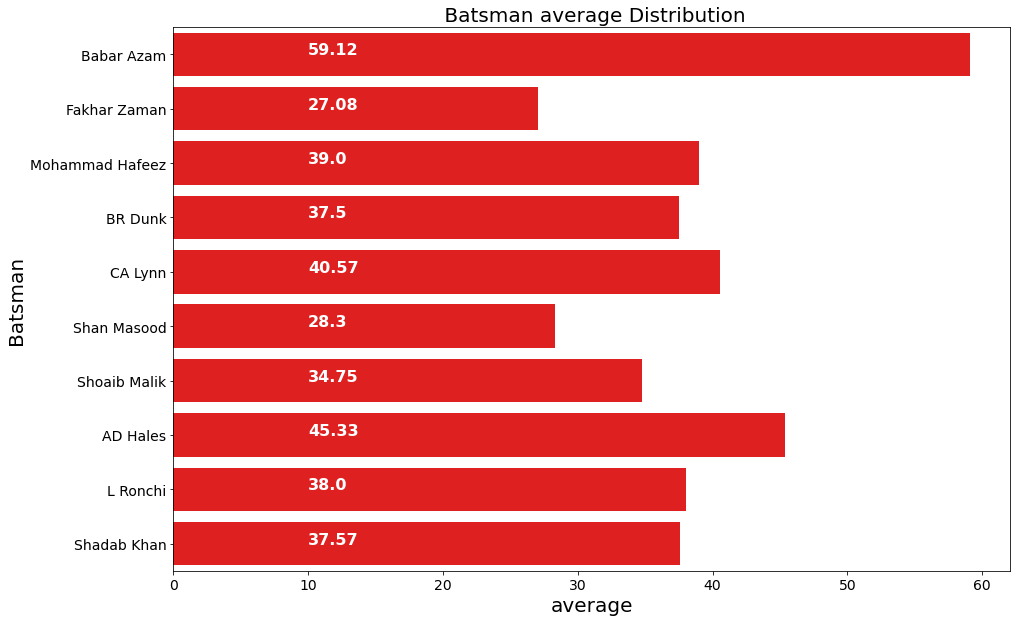

In [57]:
batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="average",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman average Distribution"

sns.barplot( x = "average" , y = "striker" , data = batsman_all_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["average"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

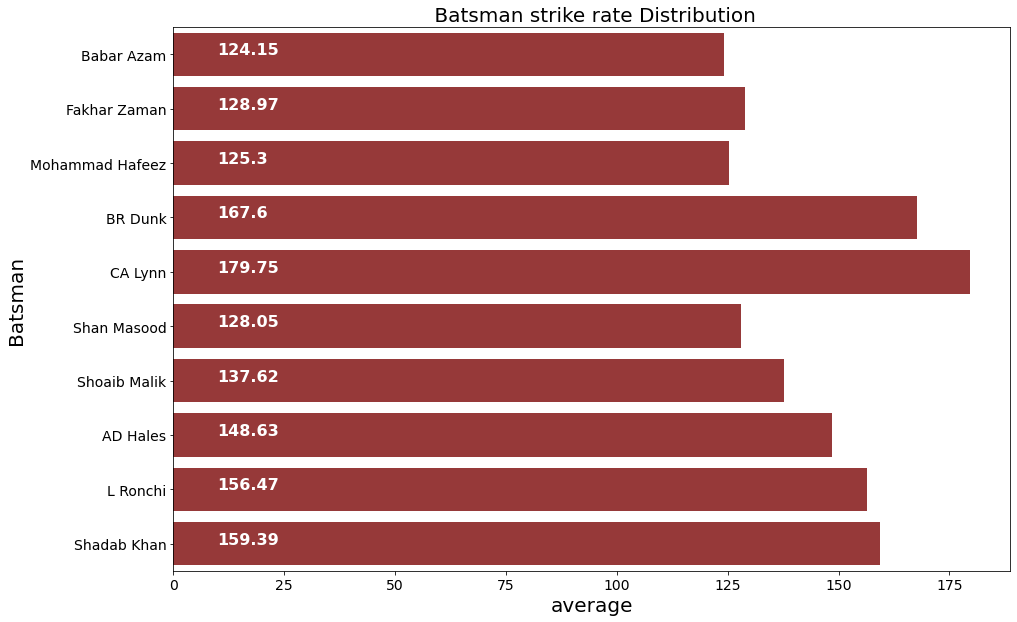

In [58]:
batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="strike_rate",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman strike rate Distribution"

sns.barplot( x = "strike_rate" , y = "striker" , data = batsman_all_stats.head(10), color = "brown")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["strike_rate"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

# PCA

In [59]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_5), index=batsman_all_stats_5.index, columns=batsman_all_stats_5.columns)

In [60]:
X

,batsman_runs,batsman_fours,batsman_six,average,strike_rate
striker,,,,,
Babar Azam,3.738499,4.393737,0.282571,2.834727,0.172054
Fakhar Zaman,2.296982,2.607867,1.329860,0.641959,0.275625
Mohammad Hafeez,2.170362,1.855922,1.539318,1.457746,0.196765
BR Dunk,2.053482,0.915990,4.052814,1.355088,1.105698
CA Lynn,1.897642,2.231894,2.586608,1.565194,1.366774
...,...,...,...,...,...
Haris Rauf,-0.868512,-0.775887,-0.764719,-1.211354,-2.495652
Mohammad Rizwan,-0.868512,-0.775887,-0.764719,-1.211354,-2.495652
Faizan Khan,-0.868512,-0.775887,-0.764719,-1.211354,-2.495652


In [61]:
from sklearn.decomposition import PCA

In [62]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5
striker,,,,,
Babar Azam,5.394670,-2.207833,2.688887,-0.419570,-0.208057
Fakhar Zaman,3.342390,-1.561790,0.175104,-0.830625,0.048428
Mohammad Hafeez,3.369425,-1.119495,0.096342,0.187121,-0.193825
BR Dunk,4.269910,-0.258507,-2.396870,0.701836,-0.058631
CA Lynn,4.341516,-0.303931,-0.649533,-0.128120,0.459781


In [63]:
df_plot = df_plot.reset_index()

In [64]:
df_plot.sort_values(by = 'PC1',ascending = False).head(10)

,striker,PC1,PC2,PC3,PC4,PC5
0,Babar Azam,5.394670,-2.207833,2.688887,-0.419570,-0.208057
4,CA Lynn,4.341516,-0.303931,-0.649533,-0.128120,0.459781
3,BR Dunk,4.269910,-0.258507,-2.396870,0.701836,-0.058631
7,AD Hales,3.559076,-0.425044,0.011982,0.472478,0.057594
2,Mohammad Hafeez,3.369425,-1.119495,0.096342,0.187121,-0.193825
1,Fakhar Zaman,3.342390,-1.561790,0.175104,-0.830625,0.048428
13,SR Watson,3.315531,-0.565815,-1.234223,-0.269772,0.392401
8,L Ronchi,3.297894,-0.503456,0.463334,-0.304187,0.191318
9,Shadab Khan,3.195046,-0.029855,-1.087314,0.533736,-0.289707
12,C Munro,3.053434,-0.294693,-1.077091,0.487937,-0.066765


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

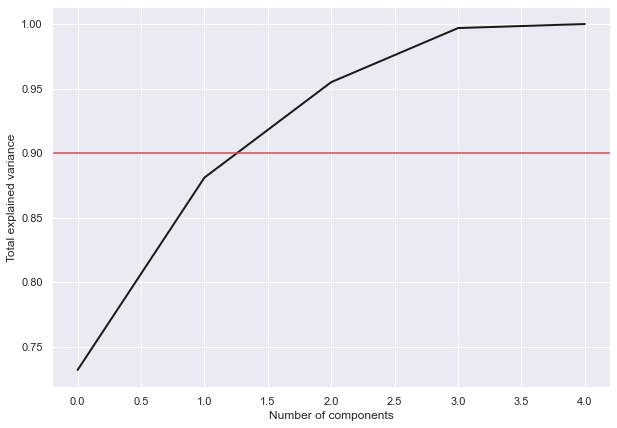

In [66]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

In [67]:
batsman_thirty = all_data_2020.groupby(["striker","match_id"])["runs_off_bat"].sum()

In [68]:
batsman_thirty = batsman_thirty.reset_index(name = "thirty")
batsman_thirty

,striker,match_id,thirty
0,A Lyth,1211672,9
1,A Lyth,1211675,50
2,AD Hales,1211647,29
3,AD Hales,1211651,29
4,AD Hales,1211655,52
...,...,...,...
475,Zeeshan Ashraf,1211663,16
476,Zeeshan Ashraf,1211668,52
477,Zeeshan Ashraf,1211670,2
478,Zeeshan Ashraf,1211672,21


In [69]:
batsman_thirty_players = batsman_thirty[(batsman_thirty["thirty"] >= 30) & 
                                          (batsman_thirty["thirty"] < 50)]

In [70]:
batsman_thirty_players = batsman_thirty_players.groupby("striker")["striker"].count()
batsman_thirty_players

striker
AD Hales           1
Azam Khan          1
BCJ Cutting        1
BR Dunk            1
Babar Azam         2
C Munro            1
CA Ingram          2
CA Lynn            2
CAK Walton         1
CS Delport         1
D Wiese            1
DJ Malan           1
DJG Sammy          1
F du Plessis       1
Fakhar Zaman       2
GC Viljoen         1
Haider Ali         3
Hussain Talat      1
Imad Wasim         1
JJ Roy             2
JM Vince           1
Kamran Akmal       2
Khushdil Shah      3
L Ronchi           1
Mohammad Hafeez    2
RR Rossouw         2
RS Bopara          2
SR Patel           1
Sarfraz Ahmed      3
Shadab Khan        1
Shahid Afridi      1
Shan Masood        3
Sharjeel Khan      2
Shoaib Malik       2
Sohail Akhtar      1
Sohail Khan        1
T Banton           1
Tamim Iqbal        2
Usman Shinwari     1
Name: striker, dtype: int64

In [71]:
batsman_thirty_players = batsman_thirty_players.reset_index(name = "thirty")

In [72]:
batsman_thirty_players

,striker,thirty
0,AD Hales,1
1,Azam Khan,1
2,BCJ Cutting,1
3,BR Dunk,1
4,Babar Azam,2
5,C Munro,1
6,CA Ingram,2
7,CA Lynn,2
8,CAK Walton,1
9,CS Delport,1


In [73]:
batsman_fifty = all_data_2020.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_fifty = batsman_fifty.reset_index(name = "fifty")
batsman_fifty_players = batsman_fifty[(batsman_fifty["fifty"] >= 50) & 
                                          (batsman_fifty["fifty"] < 100)]
batsman_fifty_players = batsman_fifty_players.groupby("striker")["striker"].count()
batsman_fifty_players = batsman_fifty_players.reset_index(name = "fifty")

In [74]:
batsman_fifty_players

,striker,fifty
0,A Lyth,1
1,AD Hales,2
2,Azam Khan,1
3,BCJ Cutting,1
4,BR Dunk,2
5,Babar Azam,5
6,C Munro,3
7,CA Ingram,1
8,CA Lynn,1
9,CS Delport,1


In [75]:
batsman_century = all_data_2020.groupby(["striker","match_id"])["runs_off_bat"].sum()

In [76]:
batsman_century = batsman_century.reset_index(name = "century")
batsman_century

,striker,match_id,century
0,A Lyth,1211672,9
1,A Lyth,1211675,50
2,AD Hales,1211647,29
3,AD Hales,1211651,29
4,AD Hales,1211655,52
...,...,...,...
475,Zeeshan Ashraf,1211663,16
476,Zeeshan Ashraf,1211668,52
477,Zeeshan Ashraf,1211670,2
478,Zeeshan Ashraf,1211672,21


In [77]:
batsman_century = batsman_century[(batsman_century["century"] >= 100)]

In [78]:
batsman_century = batsman_century.groupby("striker")["striker"].count()
batsman_century = batsman_century.reset_index(name = "century")

In [79]:
batsman_century

,striker,century
0,CA Lynn,1
1,Kamran Akmal,1
2,RR Rossouw,1


In [80]:
batsman_all_stats = batsman_all_stats.merge(batsman_thirty_players,how="left")

In [81]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team,deliveries,player_out,average,strike_rate,thirty
0,Babar Azam,473,10,55.0,5.0,Karachi Kings,381,8.0,59.12,124.15,2.0
1,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars,252,12.0,27.08,128.97,2.0
2,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars,249,8.0,39.00,125.30,2.0
3,BR Dunk,300,10,18.0,23.0,Lahore Qalandars,179,8.0,37.50,167.60,1.0
4,CA Lynn,284,8,32.0,16.0,Lahore Qalandars,158,7.0,40.57,179.75,2.0
...,...,...,...,...,...,...,...,...,...,...,...
101,Haris Rauf,0,1,NaN,NaN,Lahore Qalandars,5,1.0,0.00,0.00,NaN
102,Mohammad Rizwan,0,1,NaN,NaN,Karachi Kings,1,NaN,NaN,0.00,NaN
103,Faizan Khan,0,1,NaN,NaN,Lahore Qalandars,1,NaN,NaN,0.00,NaN
104,Akif Javed,0,1,NaN,NaN,Islamabad United,2,NaN,NaN,0.00,NaN


In [82]:
batsman_all_stats =batsman_all_stats.merge(batsman_fifty_players,how="left")
batsman_all_stats =batsman_all_stats.merge(batsman_century,how="left")

In [83]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team,deliveries,player_out,average,strike_rate,thirty,fifty,century
0,Babar Azam,473,10,55.0,5.0,Karachi Kings,381,8.0,59.12,124.15,2.0,5.0,NaN
1,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars,252,12.0,27.08,128.97,2.0,2.0,NaN
2,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars,249,8.0,39.00,125.30,2.0,2.0,NaN
3,BR Dunk,300,10,18.0,23.0,Lahore Qalandars,179,8.0,37.50,167.60,1.0,2.0,NaN
4,CA Lynn,284,8,32.0,16.0,Lahore Qalandars,158,7.0,40.57,179.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Haris Rauf,0,1,NaN,NaN,Lahore Qalandars,5,1.0,0.00,0.00,NaN,NaN,NaN
102,Mohammad Rizwan,0,1,NaN,NaN,Karachi Kings,1,NaN,NaN,0.00,NaN,NaN,NaN
103,Faizan Khan,0,1,NaN,NaN,Lahore Qalandars,1,NaN,NaN,0.00,NaN,NaN,NaN
104,Akif Javed,0,1,NaN,NaN,Islamabad United,2,NaN,NaN,0.00,NaN,NaN,NaN


In [84]:
batsman_all_stats = batsman_all_stats.fillna(0)

In [85]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team,deliveries,player_out,average,strike_rate,thirty,fifty,century
0,Babar Azam,473,10,55.0,5.0,Karachi Kings,381,8.0,59.12,124.15,2.0,5.0,0.0
1,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars,252,12.0,27.08,128.97,2.0,2.0,0.0
2,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars,249,8.0,39.00,125.30,2.0,2.0,0.0
3,BR Dunk,300,10,18.0,23.0,Lahore Qalandars,179,8.0,37.50,167.60,1.0,2.0,0.0
4,CA Lynn,284,8,32.0,16.0,Lahore Qalandars,158,7.0,40.57,179.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Haris Rauf,0,1,0.0,0.0,Lahore Qalandars,5,1.0,0.00,0.00,0.0,0.0,0.0
102,Mohammad Rizwan,0,1,0.0,0.0,Karachi Kings,1,0.0,0.00,0.00,0.0,0.0,0.0
103,Faizan Khan,0,1,0.0,0.0,Lahore Qalandars,1,0.0,0.00,0.00,0.0,0.0,0.0
104,Akif Javed,0,1,0.0,0.0,Islamabad United,2,0.0,0.00,0.00,0.0,0.0,0.0


In [86]:
batsman_all_stats["CHT"] = 2*batsman_all_stats["century"]+ 1.5*batsman_all_stats["fifty"] + batsman_all_stats["thirty"]



In [87]:
batsman_all_stats.columns

Index(['striker', 'batsman_runs', 'batsman_matches', 'batsman_fours',
       'batsman_six', 'team', 'deliveries', 'player_out', 'average',
       'strike_rate', 'thirty', 'fifty', 'century', 'CHT'],
      dtype='object')

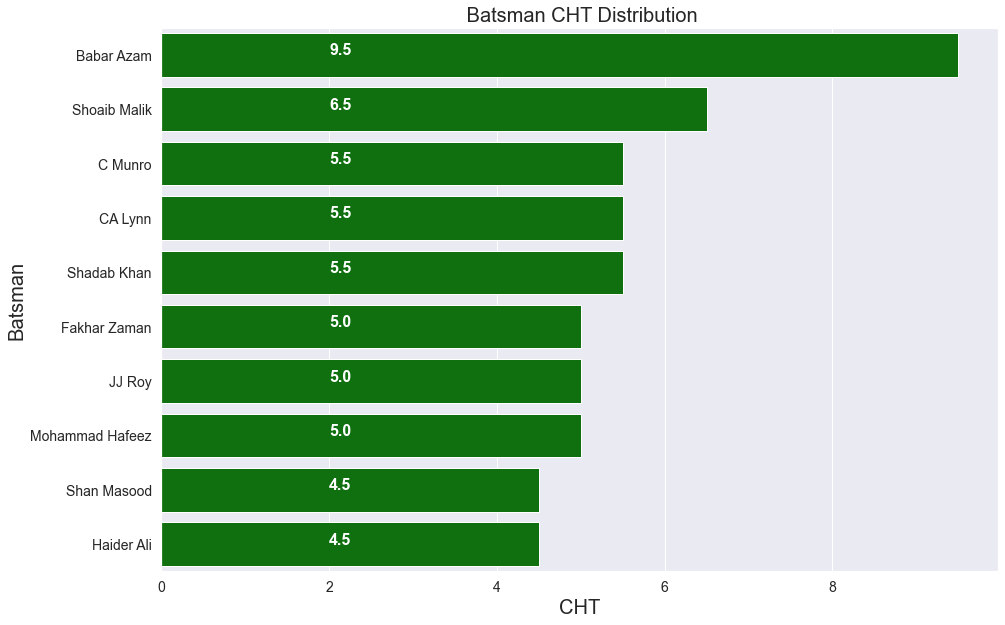

In [88]:
batsman_all_stats = batsman_all_stats.sort_values(by ="CHT",ascending =False)
xlabel_name = "CHT"
ylabel_name = "Batsman"
title_name = " Batsman CHT Distribution"

sns.barplot( x = "CHT" , y = "striker" , data = batsman_all_stats.head(10), color = "green")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["CHT"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

# PCA again

In [89]:
batsman_all_stats = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

In [90]:
batsman_all_stats

,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team,deliveries,player_out,average,strike_rate,thirty,fifty,century,CHT
0,Babar Azam,473,10,55.0,5.0,Karachi Kings,381,8.0,59.12,124.15,2.0,5.0,0.0,9.5
6,Shoaib Malik,278,8,27.0,8.0,Peshawar Zalmi,202,8.0,34.75,137.62,2.0,3.0,0.0,6.5
12,C Munro,248,8,18.0,15.0,Islamabad United,168,7.0,35.43,147.62,1.0,3.0,0.0,5.5
4,CA Lynn,284,8,32.0,16.0,Lahore Qalandars,158,7.0,40.57,179.75,2.0,1.0,1.0,5.5
9,Shadab Khan,263,8,16.0,15.0,Islamabad United,165,7.0,37.57,159.39,1.0,3.0,0.0,5.5
1,Fakhar Zaman,325,12,36.0,10.0,Lahore Qalandars,252,12.0,27.08,128.97,2.0,2.0,0.0,5.0
15,JJ Roy,233,8,25.0,6.0,Quetta Gladiators,194,7.0,33.29,120.10,2.0,2.0,0.0,5.0
2,Mohammad Hafeez,312,12,28.0,11.0,Lahore Qalandars,249,8.0,39.00,125.30,2.0,2.0,0.0,5.0
5,Shan Masood,283,10,30.0,2.0,Multan Sultans,221,10.0,28.30,128.05,3.0,1.0,0.0,4.5
14,Haider Ali,239,10,20.0,14.0,Peshawar Zalmi,152,9.0,26.56,157.24,3.0,1.0,0.0,4.5


In [91]:
batsman_all_stats_6 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate',"CHT"]]

In [92]:
batsman_all_stats_6.index = batsman_all_stats["striker"]

In [93]:
batsman_all_stats_6

,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
striker,,,,,,
Babar Azam,473,55.0,5.0,59.12,124.15,9.5
Shoaib Malik,278,27.0,8.0,34.75,137.62,6.5
C Munro,248,18.0,15.0,35.43,147.62,5.5
CA Lynn,284,32.0,16.0,40.57,179.75,5.5
Shadab Khan,263,16.0,15.0,37.57,159.39,5.5
Fakhar Zaman,325,36.0,10.0,27.08,128.97,5.0
JJ Roy,233,25.0,6.0,33.29,120.10,5.0
Mohammad Hafeez,312,28.0,11.0,39.00,125.30,5.0
Shan Masood,283,30.0,2.0,28.30,128.05,4.5


In [94]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

In [95]:
X

,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
striker,,,,,,
Babar Azam,3.389592,3.570853,-0.831219,2.924697,-1.083075,3.289890
Shoaib Malik,0.763935,0.607076,-0.212355,0.342494,-0.334209,1.607841
C Munro,0.359988,-0.345566,1.231661,0.414546,0.221743,1.047158
CA Lynn,0.844725,1.136322,1.437949,0.959171,2.008015,1.047158
Shadab Khan,0.561962,-0.557265,1.231661,0.641297,0.876098,1.047158
Fakhar Zaman,1.396786,1.559719,0.200221,-0.470205,-0.815107,0.766816
JJ Roy,0.158015,0.395378,-0.624931,0.187795,-1.308236,0.766816
Mohammad Hafeez,1.221742,0.712925,0.406509,0.792817,-1.019141,0.766816
Shan Masood,0.831260,0.924624,-1.450084,-0.340936,-0.866254,0.486475


In [106]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index=X.index)
df_plot.head(15)
df_plot = df_plot.reset_index() 
df_plot

,striker,PC1,PC2,PC3,PC4,PC5,PC6
0,Babar Azam,6.238521,-2.288628,1.143161,-0.041876,0.007261,0.126268
1,Shoaib Malik,1.633857,-0.652131,-0.090805,-0.143825,0.827642,-0.051929
2,C Munro,1.003593,0.979547,-0.571573,-0.738059,0.468661,-0.160536
3,CA Lynn,2.287060,2.013895,0.185393,0.846774,0.086739,-0.275368
4,Shadab Khan,1.123043,1.525396,-0.267403,-0.599204,0.603208,0.190298
5,Fakhar Zaman,1.733253,-1.135452,-1.066419,0.602584,-0.320862,0.024383
6,JJ Roy,0.585838,-1.458365,-0.023889,-0.538063,0.273329,-0.267886
7,Mohammad Hafeez,1.773713,-0.692411,-0.344619,-0.698296,-0.424584,0.096110
8,Shan Masood,0.691858,-1.922308,0.102701,0.568592,0.228428,0.438177
9,Haider Ali,0.343538,1.065207,-0.849579,0.280834,0.397327,-0.011379


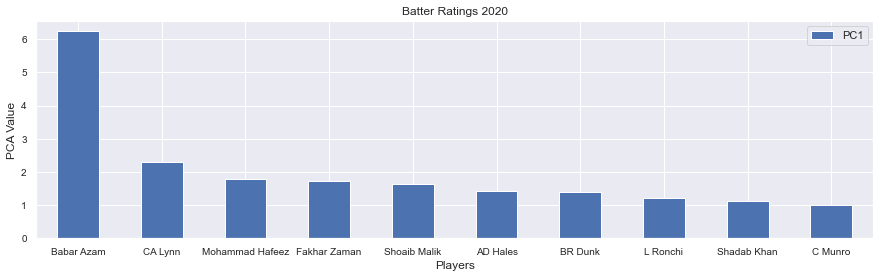

In [112]:
df_plot = df_plot.sort_values(by = ["PC1","PC2"],ascending = False)
df_plot_temp = df_plot.head(10)

ax =df_plot_temp.plot(x = 'striker', y = 'PC1', kind='bar', rot=0,
                figsize=(15,4), # Figsize to make the plot larger
            title='Batter Ratings 2020', # Adding a title to the top
            xlabel="Players", # Adding a label on the xaxis
            ylabel="PCA Value", # Adding a label on y axis
            fontsize='small')
fig = ax.get_figure()
fig.savefig('batter_sample_graph.jpg',dpi=200,bbox_inches='tight')

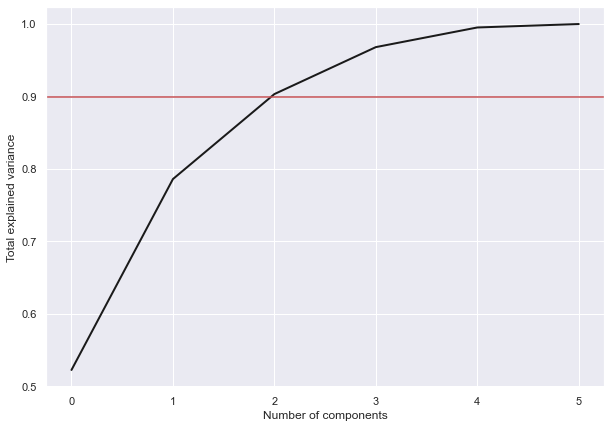

In [84]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

In [85]:
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2"],ascending = False)

In [86]:
df_plot.head(20)

,striker,PC1,PC2,PC3,PC4,PC5,PC6
0,Babar Azam,6.238521,-2.288628,1.143161,-0.041876,0.007261,0.126268
3,CA Lynn,2.287060,2.013895,0.185393,0.846774,0.086739,-0.275368
7,Mohammad Hafeez,1.773713,-0.692411,-0.344619,-0.698296,-0.424584,0.096110
5,Fakhar Zaman,1.733253,-1.135452,-1.066419,0.602584,-0.320862,0.024383
1,Shoaib Malik,1.633857,-0.652131,-0.090805,-0.143825,0.827642,-0.051929
11,AD Hales,1.434452,0.609090,0.599071,-0.421795,-0.624184,0.005933
15,BR Dunk,1.396856,2.821159,-1.092725,-0.486398,-0.614660,0.224602
12,L Ronchi,1.221323,0.267712,0.579221,0.673955,-0.308476,0.017195
4,Shadab Khan,1.123043,1.525396,-0.267403,-0.599204,0.603208,0.190298
2,C Munro,1.003593,0.979547,-0.571573,-0.738059,0.468661,-0.160536


In [87]:
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2","PC3"],ascending = False)

In [88]:
df_plot.head(20)

df_plot = df_plot.merge(batsman_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values("PC1",ascending = False)



,index,striker,PC1,PC2,PC3,PC4,PC5,PC6,team
78,0.0,Babar Azam,6.238521,-2.288628,1.143161,-0.041876,0.007261,0.126268,Karachi Kings
66,3.0,CA Lynn,2.287060,2.013895,0.185393,0.846774,0.086739,-0.275368,Lahore Qalandars
73,7.0,Mohammad Hafeez,1.773713,-0.692411,-0.344619,-0.698296,-0.424584,0.096110,Lahore Qalandars
70,5.0,Fakhar Zaman,1.733253,-1.135452,-1.066419,0.602584,-0.320862,0.024383,Lahore Qalandars
30,1.0,Shoaib Malik,1.633857,-0.652131,-0.090805,-0.143825,0.827642,-0.051929,Peshawar Zalmi
79,11.0,AD Hales,1.434452,0.609090,0.599071,-0.421795,-0.624184,0.005933,Karachi Kings
63,15.0,BR Dunk,1.396856,2.821159,-1.092725,-0.486398,-0.614660,0.224602,Lahore Qalandars
97,12.0,L Ronchi,1.221323,0.267712,0.579221,0.673955,-0.308476,0.017195,Islamabad United
95,4.0,Shadab Khan,1.123043,1.525396,-0.267403,-0.599204,0.603208,0.190298,Islamabad United
99,2.0,C Munro,1.003593,0.979547,-0.571573,-0.738059,0.468661,-0.160536,Islamabad United


In [122]:
df_plot.to_csv('batters_pca_2020.csv',index=False)

In [507]:
average_pca_team = pd.DataFrame()

In [620]:
average_pca_team["std_dev"] = df_plot.groupby('team', as_index=False)['PC1'].std()

ValueError: Expected a 1D array, got an array with shape (6, 2)

In [568]:
average_pca_team

average_pca_team.to_csv('PCA_2020_Batsman.csv', index=False)

In [618]:
average_pca_team

,team,PC1
0,Islamabad United,-0.245910
1,Karachi Kings,-0.705016
2,Lahore Qalandars,1.136496
3,Multan Sultans,1.236945
4,Peshawar Zalmi,-0.545951
5,Quetta Gladiators,-0.590680


# covariance matrix

In [569]:
X_std = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

In [570]:
X_std

,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
striker,,,,,,
Fakhar Zaman,3.116218,2.579457,2.277944,0.950420,0.312778,3.262569
Mohammad Rizwan,2.734908,2.029862,-0.041137,2.624941,-0.746490,2.585276
Shoaib Malik,1.547646,0.930673,1.012991,0.954813,-0.227290,1.907984
Shan Masood,2.145610,2.579457,0.169689,0.544054,-0.267774,1.738660
Babar Azam,0.975681,1.480267,-1.516915,0.418117,-1.079963,1.061367
AD Hales,1.079675,1.715808,0.380514,0.877201,0.114113,0.892044
JJ Roy,0.629035,1.558781,0.169689,1.325301,1.070710,0.722721
Kamran Ghulam,0.594371,0.302564,-0.041137,-0.547643,-1.140064,0.553398
Ahsan Ali,0.169730,0.852159,-0.673613,0.242391,-0.236889,0.553398


In [571]:
X_std["batsman_runs"].mean() , X_std["batsman_runs"].std() 

(8.665155314147564e-17, 1.0124228365658292)

In [572]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.025     ,  0.93167634,  0.47008388,  0.57802349, -0.01694269,
         0.98841052],
       [ 0.93167634,  1.025     ,  0.22463159,  0.51941466, -0.04608054,
         0.92082339],
       [ 0.47008388,  0.22463159,  1.025     ,  0.26290744,  0.60249366,
         0.39548205],
       [ 0.57802349,  0.51941466,  0.26290744,  1.025     ,  0.19381636,
         0.63124861],
       [-0.01694269, -0.04608054,  0.60249366,  0.19381636,  1.025     ,
        -0.04036906],
       [ 0.98841052,  0.92082339,  0.39548205,  0.63124861, -0.04036906,
         1.025     ]])

In [573]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.51956045 -0.11119402  0.22030494 -0.03176482 -0.81353756  0.07941159]
 [-0.48254463 -0.22211677  0.12629296  0.51498709  0.29490246 -0.59134232]
 [-0.27851276  0.59262598  0.40658342 -0.53765428  0.2009758  -0.27649884]
 [-0.38239216  0.05355098 -0.85517125 -0.30773536  0.0019306  -0.15775262]
 [-0.07525351  0.74972301 -0.17057408  0.59135269 -0.1035114   0.20674666]
 [-0.51744701 -0.14880245  0.09895638 -0.01755293  0.44730255  0.70705472]]

Eigenvalues 
[3.54964654 1.53926813 0.64000145 0.3383344  0.02416438 0.05858511]


In [574]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.5496465353192113
1.5392681285257925
0.6400014544915091
0.3383343998199295
0.05858510598268621
0.02416437586087166


In [575]:
eig_pairs[0]

(3.5496465353192113,
 array([-0.51956045, -0.48254463, -0.27851276, -0.38239216, -0.07525351,
        -0.51744701]))

In [576]:
eig_pairs[0][1]

array([-0.51956045, -0.48254463, -0.27851276, -0.38239216, -0.07525351,
       -0.51744701])

In [577]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1) ,
                      eig_pairs[2][1].reshape(6,1) ,
                      eig_pairs[3][1].reshape(6,1),
                      eig_pairs[4][1].reshape(6,1),
                      eig_pairs[5][1].reshape(6,1)
                     
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.51956045 -0.11119402  0.22030494 -0.03176482  0.07941159 -0.81353756]
 [-0.48254463 -0.22211677  0.12629296  0.51498709 -0.59134232  0.29490246]
 [-0.27851276  0.59262598  0.40658342 -0.53765428 -0.27649884  0.2009758 ]
 [-0.38239216  0.05355098 -0.85517125 -0.30773536 -0.15775262  0.0019306 ]
 [-0.07525351  0.74972301 -0.17057408  0.59135269  0.20674666 -0.1035114 ]
 [-0.51744701 -0.14880245  0.09895638 -0.01755293  0.70705472  0.44730255]]


In [578]:
w_df = pd.DataFrame(matrix_w)

In [579]:
w_df

,0,1,2,3,4,5
0,-0.519560,-0.111194,0.220305,-0.031765,0.079412,-0.813538
1,-0.482545,-0.222117,0.126293,0.514987,-0.591342,0.294902
2,-0.278513,0.592626,0.406583,-0.537654,-0.276499,0.200976
3,-0.382392,0.053551,-0.855171,-0.307735,-0.157753,0.001931
4,-0.075254,0.749723,-0.170574,0.591353,0.206747,-0.103511
5,-0.517447,-0.148802,0.098956,-0.017553,0.707055,0.447303


In [580]:
w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4', 4: 'PC5', 5: 'PC6'}, inplace = True)

In [581]:
w_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.519560,-0.111194,0.220305,-0.031765,0.079412,-0.813538
1,-0.482545,-0.222117,0.126293,0.514987,-0.591342,0.294902
2,-0.278513,0.592626,0.406583,-0.537654,-0.276499,0.200976
3,-0.382392,0.053551,-0.855171,-0.307735,-0.157753,0.001931
4,-0.075254,0.749723,-0.170574,0.591353,0.206747,-0.103511
5,-0.517447,-0.148802,0.098956,-0.017553,0.707055,0.447303


In [582]:
batsman = ["runs","batsman_fours","batsman_six","average","strike_rate","CHT"]

In [583]:
component_number = "PC1"

In [619]:
components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["batsman"] = batsman
components_n

,value,batsman
0,-0.519560,runs
1,-0.482545,batsman_fours
2,-0.278513,batsman_six
3,-0.382392,average
4,-0.075254,strike_rate
5,-0.517447,CHT


In [585]:
def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["batsman"] = batsman
    sns.barplot( y = 'value', x = 'batsman', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

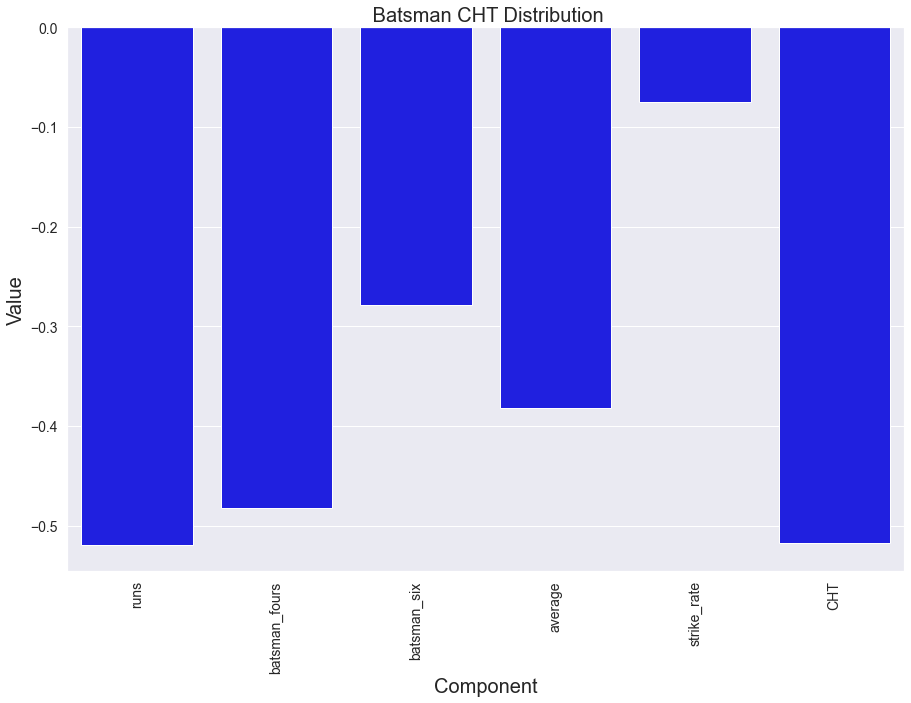

In [586]:
plot_component_number("PC1")

In [587]:
Y = X_std.dot(matrix_w)

In [588]:
Y

,0,1,2,3,4,5
striker,,,,,,
Fakhar Zaman,-5.573380,0.230438,1.395188,-0.160129,0.313823,0.112153
Mohammad Rizwan,-4.674316,-1.583138,-1.019467,-0.314009,0.287721,-0.395868
Shoaib Malik,-2.870607,-0.181668,0.281405,-0.576244,0.443897,0.097792
Shan Masood,-3.494293,-1.141296,0.619916,0.812706,-0.313734,-0.144268
Babar Azam,-1.426555,-2.281462,-0.283176,0.760963,0.082768,-0.074734
AD Hales,-2.300496,-0.275870,-0.072085,0.426616,-0.518167,0.093009
JJ Roy,-2.087593,0.450550,-0.840042,0.904176,-0.395440,0.197051
Kamran Ghulam,-0.434501,-1.124079,0.869985,-0.356310,0.121625,-0.038095
Ahsan Ali,-0.672995,-0.854320,-0.240982,0.571239,-0.000117,0.250367


In [589]:
Y_1 = Y.reset_index()


In [590]:
Y_1

,striker,0,1,2,3,4,5
0,Fakhar Zaman,-5.573380,0.230438,1.395188,-0.160129,0.313823,0.112153
1,Mohammad Rizwan,-4.674316,-1.583138,-1.019467,-0.314009,0.287721,-0.395868
2,Shoaib Malik,-2.870607,-0.181668,0.281405,-0.576244,0.443897,0.097792
3,Shan Masood,-3.494293,-1.141296,0.619916,0.812706,-0.313734,-0.144268
4,Babar Azam,-1.426555,-2.281462,-0.283176,0.760963,0.082768,-0.074734
5,AD Hales,-2.300496,-0.275870,-0.072085,0.426616,-0.518167,0.093009
6,JJ Roy,-2.087593,0.450550,-0.840042,0.904176,-0.395440,0.197051
7,Kamran Ghulam,-0.434501,-1.124079,0.869985,-0.356310,0.121625,-0.038095
8,Ahsan Ali,-0.672995,-0.854320,-0.240982,0.571239,-0.000117,0.250367
9,Mohammad Hafeez,-0.719862,-0.931651,0.490466,0.013608,0.151008,-0.252159


In [591]:
Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

,striker,PC1,PC2,2,3,4,5
0,Fakhar Zaman,-5.573380,0.230438,1.395188,-0.160129,0.313823,0.112153
1,Mohammad Rizwan,-4.674316,-1.583138,-1.019467,-0.314009,0.287721,-0.395868
3,Shan Masood,-3.494293,-1.141296,0.619916,0.812706,-0.313734,-0.144268
2,Shoaib Malik,-2.870607,-0.181668,0.281405,-0.576244,0.443897,0.097792
5,AD Hales,-2.300496,-0.275870,-0.072085,0.426616,-0.518167,0.093009
6,JJ Roy,-2.087593,0.450550,-0.840042,0.904176,-0.395440,0.197051
4,Babar Azam,-1.426555,-2.281462,-0.283176,0.760963,0.082768,-0.074734
19,TH David,-1.248720,3.030608,0.283278,-0.332867,-0.224393,-0.055830
11,HC Brook,-1.207726,0.980842,-1.215493,0.009585,0.082884,-0.073915
12,RR Rossouw,-1.005523,1.208476,-0.039550,0.010356,-0.156626,-0.024348


In [592]:
df_plot.sort_values(by = 'PC1',ascending = False).head(15)

,index,striker,PC1,PC2,PC3,PC4,PC5,PC6,team
67,0.0,Fakhar Zaman,5.573380,0.230438,-1.395188,0.160129,-0.313823,-0.112153,Lahore Qalandars
42,1.0,Mohammad Rizwan,4.674316,-1.583138,1.019467,0.314009,-0.287721,0.395868,Multan Sultans
53,3.0,Shan Masood,3.494293,-1.141296,-0.619916,-0.812706,0.313734,0.144268,Multan Sultans
28,2.0,Shoaib Malik,2.870607,-0.181668,-0.281405,0.576244,-0.443897,-0.097792,Peshawar Zalmi
94,5.0,AD Hales,2.300496,-0.275870,0.072085,-0.426616,0.518167,-0.093009,Islamabad United
9,6.0,JJ Roy,2.087593,0.450550,0.840042,-0.904176,0.395440,-0.197051,Quetta Gladiators
73,4.0,Babar Azam,1.426555,-2.281462,0.283176,-0.760963,-0.082768,0.074734,Karachi Kings
47,19.0,TH David,1.248720,3.030608,-0.283278,0.332867,0.224393,0.055830,Multan Sultans
68,11.0,HC Brook,1.207726,0.980842,1.215493,-0.009585,-0.082884,0.073915,Lahore Qalandars
51,12.0,RR Rossouw,1.005523,1.208476,0.039550,-0.010356,0.156626,0.024348,Multan Sultans


# PCA 2021

In [109]:
# PCA 2021

#TOTAL RUNS 2021

batsman_runs = all_data_2021.groupby(["striker"])["runs_off_bat"].sum()

batsman_runs = batsman_runs.reset_index( name = 'batsman_runs').sort_values( by = 'batsman_runs',ascending = False) 

batsman_runs.head()




,striker,batsman_runs
17,Babar Azam,554
69,Mohammad Rizwan,500
101,Sohaib Maqsood,428
100,Shoaib Malik,354
99,Sharjeel Khan,338


,striker,team
57,Khurram Shahzad (2),Quetta Gladiators
93,Sarfraz Ahmed,Quetta Gladiators
24,CS Delport,Quetta Gladiators
1,AD Russell,Quetta Gladiators
22,CH Gayle,Quetta Gladiators
...,...,...
71,Mohammad Wasim,Islamabad United
72,Muhammad Akhlaq,Islamabad United
77,PD Salt,Islamabad United
86,Rohail Nazir,Islamabad United


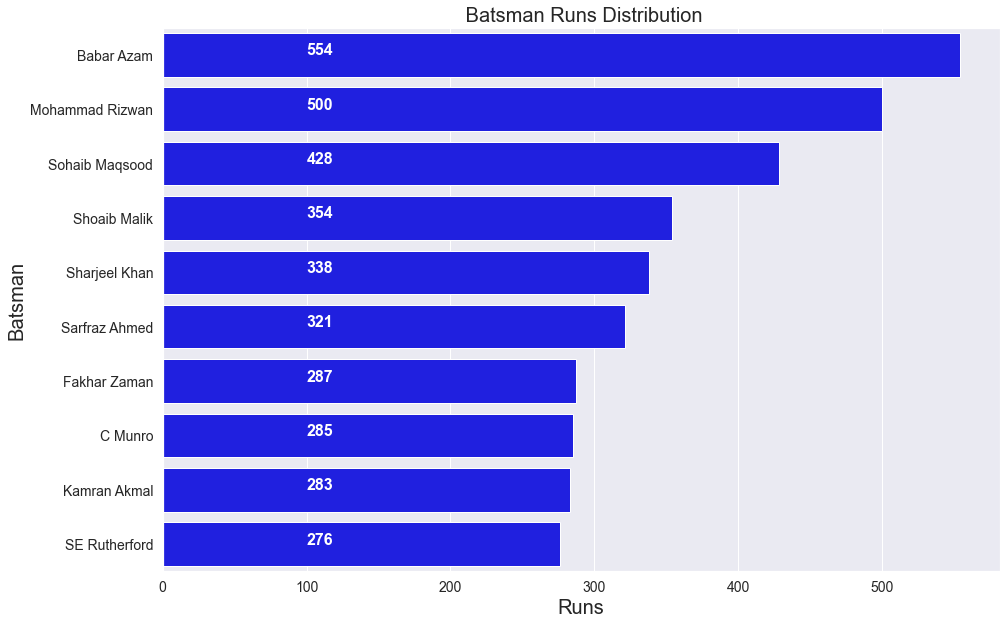

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

xlabel_name = "Runs"
ylabel_name = "Batsman"
title_name = " Batsman Runs Distribution"

sns.barplot( x = "batsman_runs" , y = "striker" , data = batsman_runs.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_runs.head(10)["batsman_runs"].values):
    ax.text(100, i, v,fontsize=16,color='white',weight='bold')



batsman_team = all_data_2021.groupby(['striker'])["batting_team"].unique()\
.reset_index(name = 'batting_team').sort_values( by = 'batting_team',ascending = False)

batsman_team['team'] = [''.join(map(str, l)) for l in batsman_team['batting_team']]
batsman_team.drop("batting_team",axis=1,inplace = True)
batsman_team




In [111]:
# Matches



batsman_matches = all_data_2021[["striker","match_id"]]

batsman_matches_count = batsman_matches.drop_duplicates().groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_matches')

batsman_matches_count

batsman_all_stats = batsman_runs.merge(batsman_matches_count)

batsman_all_stats


# Player Outs



batsman_outs = all_data_2021['player_dismissed'].value_counts(dropna=True)\
.reset_index(name = 'player_out').sort_values( by = 'player_out',ascending = False)
batsman_outs.rename(columns={'index':'striker'},inplace=True)
batsman_outs.drop(index=batsman_outs.index[0], 
        axis=0, 
        inplace=True)

batsman_outs



,striker,player_out
1,Kamran Akmal,13
2,Mohammad Rizwan,11
3,Sharjeel Khan,11
4,Azam Khan,10
5,Sohail Akhtar,10
...,...,...
86,Mohammad Ilyas,1
85,Mohammad Umar,1
84,Zahir Khan,1
83,Usman Qadir,1


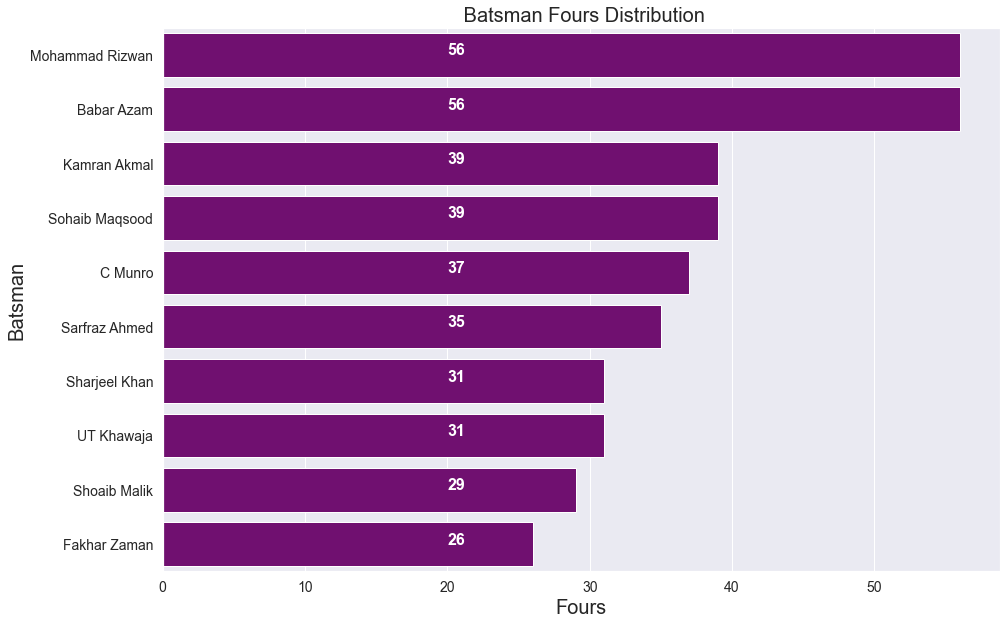

In [112]:






# Fours

all_data_four_runs = all_data_2021[(all_data_2021["is_four"] == True)]

batsman_fours = all_data_four_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_fours').sort_values( by = 'batsman_fours',ascending = False) 

batsman_fours

xlabel_name = "Fours"
ylabel_name = "Batsman"
title_name = " Batsman Fours Distribution"

sns.barplot( x = "batsman_fours" , y = "striker" , data = batsman_fours.head(10), color = "purple")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_fours.head(10)["batsman_fours"].values):
    ax.text(20, i, v,fontsize=16,color='white',weight='bold')



,striker,batsman_runs,batsman_matches,batsman_fours,batsman_six,team
88,Babar Azam,554,11,56.0,12.0,Karachi Kings
50,Mohammad Rizwan,500,12,56.0,10.0,Multan Sultans
53,Sohaib Maqsood,428,12,39.0,22.0,Multan Sultans
25,Shoaib Malik,354,13,29.0,17.0,Peshawar Zalmi
82,Sharjeel Khan,338,11,31.0,23.0,Karachi Kings
...,...,...,...,...,...,...
8,DW Steyn,0,1,NaN,NaN,Quetta Gladiators
98,Aamer Yamin,0,1,NaN,NaN,Karachi Kings
48,Mohammad Umar,0,1,NaN,NaN,Multan Sultans
92,Arshad Iqbal,0,1,NaN,NaN,Karachi Kings


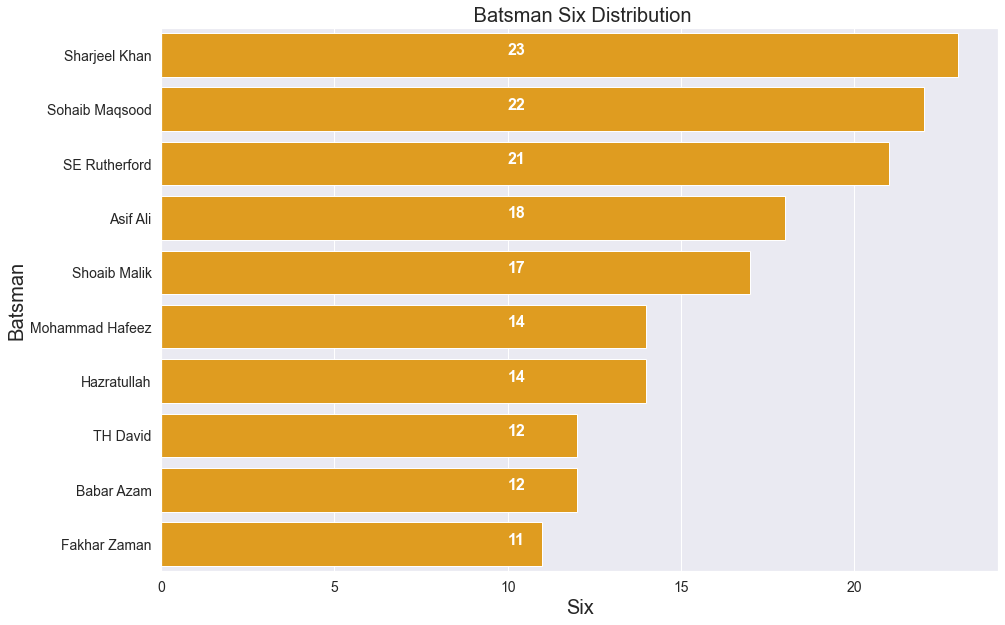

In [113]:
# Six

all_data_six_runs = all_data_2021[(all_data_2021["is_six"] == True)]

batsman_six = all_data_six_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_six').sort_values( by = 'batsman_six',ascending = False) 

batsman_six

xlabel_name = "Six"
ylabel_name = "Batsman"
title_name = " Batsman Six Distribution"

sns.barplot( x = "batsman_six" , y = "striker" , data = batsman_six.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_six.head(10)["batsman_six"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')

batsman_all_stats = batsman_all_stats.merge(batsman_fours,how = "left")

batsman_all_stats

batsman_all_stats = batsman_all_stats.merge(batsman_six,how = "left")
batsman_all_stats

batsman_all_stats = batsman_all_stats.merge(batsman_team,how="right")
batsman_all_stats = batsman_all_stats.sort_values("batsman_runs",ascending=False)

batsman_all_stats


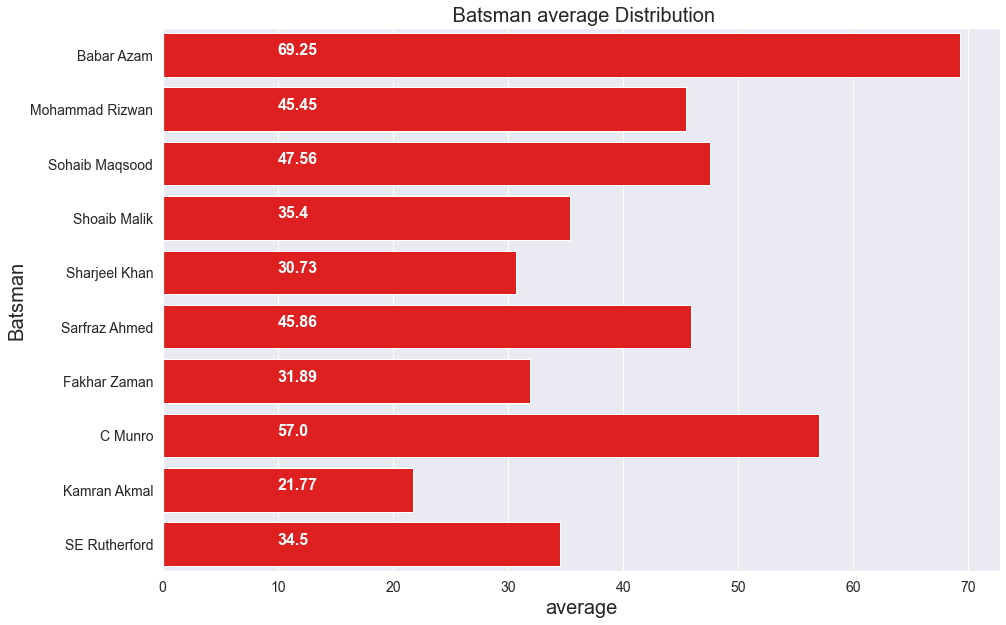

In [114]:

# Average , Strike Rate


batsman_del = all_data_2021.groupby(["striker"])["is_wide"].apply(lambda x: (x==False).sum())\
.reset_index( name = 'deliveries').sort_values( by = 'deliveries',ascending = False) 



batsman_del

batsman_outs

batsman_all_stats = batsman_all_stats.merge(batsman_del,how = "left")
batsman_all_stats = batsman_all_stats.merge(batsman_outs,how = "left")

batsman_all_stats['player_out'].fillna(1)

batsman_all_stats["average"] = round(batsman_all_stats["batsman_runs"] / batsman_all_stats["player_out"],2)

batsman_all_stats["strike_rate"] =round(batsman_all_stats["batsman_runs"]  / batsman_all_stats["deliveries"] *100,2)

batsman_all_stats

batsman_all_stats.columns

batsman_all_stats_5 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate']]

batsman_all_stats_5.index =batsman_all_stats["striker"]

batsman_all_stats_5 =batsman_all_stats_5.fillna(0)

batsman_all_stats_5

batsman_all_stats_v2 = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="average",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman average Distribution"

sns.barplot( x = "average" , y = "striker" , data = batsman_all_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["average"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')




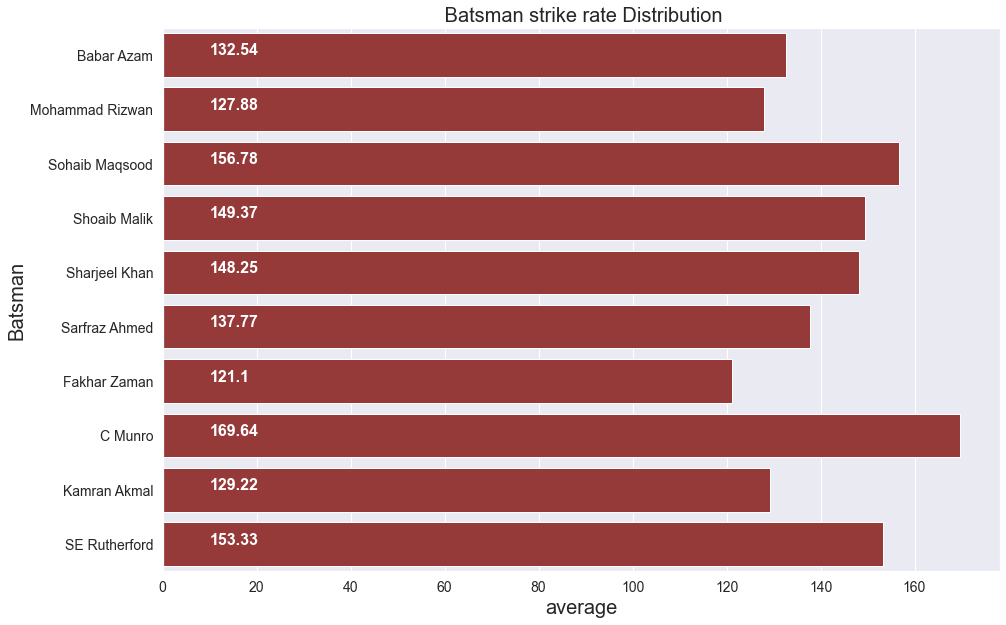

In [115]:
batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="strike_rate",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman strike rate Distribution"

sns.barplot( x = "strike_rate" , y = "striker" , data = batsman_all_stats.head(10), color = "brown")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["strike_rate"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')


In [116]:
# PCA

from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_5), index=batsman_all_stats_5.index, columns=batsman_all_stats_5.columns)

X

from sklearn.decomposition import PCA

# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5'], index=X.index)
df_plot.head()

df_plot = df_plot.reset_index()

df_plot.sort_values(by = 'PC1',ascending = False).head(10)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()




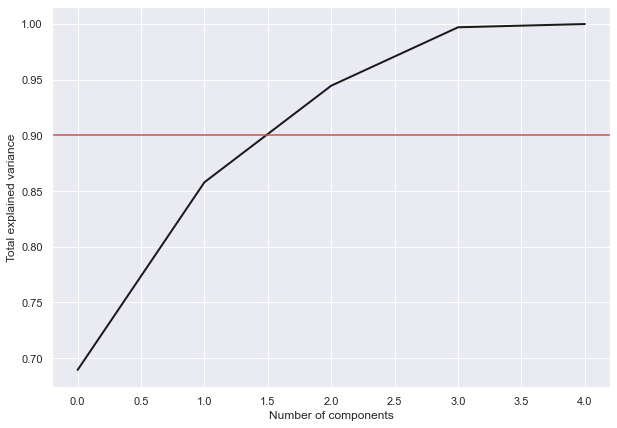

In [117]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

batsman_thirty = all_data_2021.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_thirty = batsman_thirty.reset_index(name = "thirty")
batsman_thirty

batsman_thirty_players = batsman_thirty[(batsman_thirty["thirty"] >= 30) & 
                                          (batsman_thirty["thirty"] < 50)]

batsman_thirty_players = batsman_thirty_players.groupby("striker")["striker"].count()
batsman_thirty_players

batsman_thirty_players = batsman_thirty_players.reset_index(name = "thirty")

batsman_thirty_players

batsman_fifty = all_data_2021.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_fifty = batsman_fifty.reset_index(name = "fifty")
batsman_fifty_players = batsman_fifty[(batsman_fifty["fifty"] >= 50) & 
                                          (batsman_fifty["fifty"] < 100)]
batsman_fifty_players = batsman_fifty_players.groupby("striker")["striker"].count()
batsman_fifty_players = batsman_fifty_players.reset_index(name = "fifty")

batsman_fifty_players

batsman_century = all_data_2021.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_century = batsman_century.reset_index(name = "century")
batsman_century

batsman_century = batsman_century[(batsman_century["century"] >= 100)]

batsman_century = batsman_century.groupby("striker")["striker"].count()
batsman_century = batsman_century.reset_index(name = "century")

batsman_century

batsman_all_stats = batsman_all_stats.merge(batsman_thirty_players,how="left")

batsman_all_stats

batsman_all_stats =batsman_all_stats.merge(batsman_fifty_players,how="left")
batsman_all_stats =batsman_all_stats.merge(batsman_century,how="left")

batsman_all_stats

batsman_all_stats = batsman_all_stats.fillna(0)

batsman_all_stats

batsman_all_stats["CHT"] = 2*batsman_all_stats["century"]+ 1.5*batsman_all_stats["fifty"] + batsman_all_stats["thirty"]





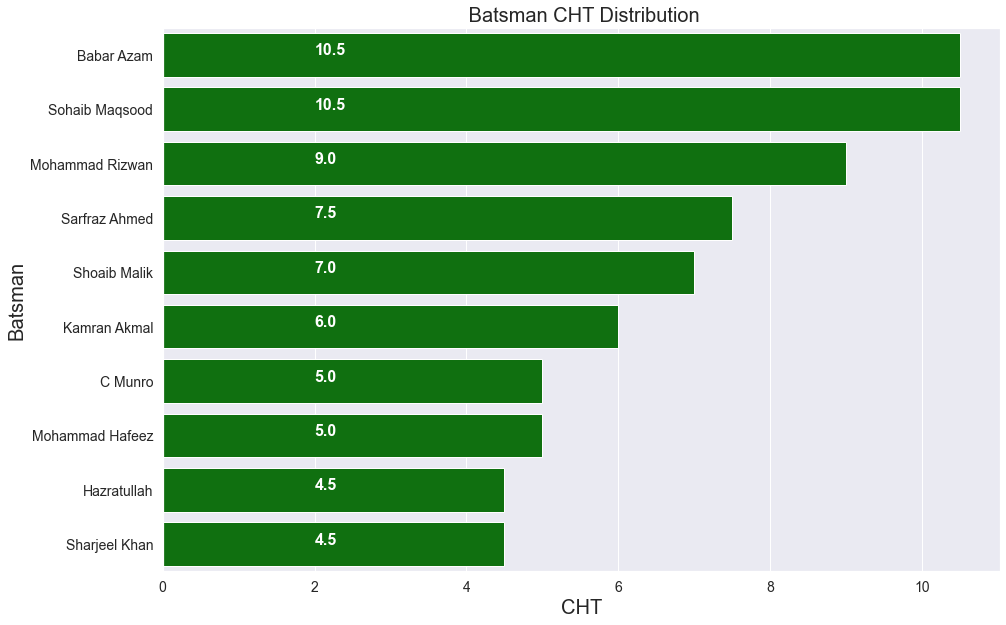

In [118]:

batsman_all_stats.columns

batsman_all_stats = batsman_all_stats.sort_values(by ="CHT",ascending =False)
xlabel_name = "CHT"
ylabel_name = "Batsman"
title_name = " Batsman CHT Distribution"

sns.barplot( x = "CHT" , y = "striker" , data = batsman_all_stats.head(10), color = "green")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["CHT"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')


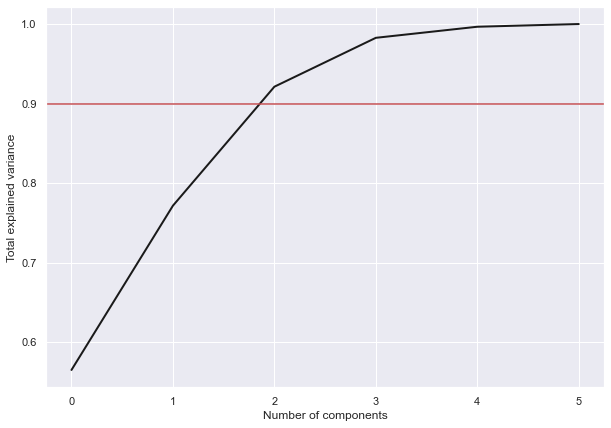

,index,striker,PC1,PC2,PC3,PC4,PC5,PC6,team
88,0.0,Babar Azam,5.209432,-1.566565,1.300657,0.033398,-0.077985,-0.329597,Karachi Kings
53,1.0,Sohaib Maqsood,4.466085,0.287083,-0.698173,-0.519199,0.808672,0.285548,Multan Sultans
50,2.0,Mohammad Rizwan,4.103493,-2.062082,0.374153,0.593261,-0.253844,-0.172246,Multan Sultans
25,4.0,Shoaib Malik,2.370352,0.118736,-0.841296,-0.362847,0.375109,-0.078062,Peshawar Zalmi
82,9.0,Sharjeel Khan,2.147387,0.512927,-1.679797,-0.932870,-0.668206,0.220288,Karachi Kings
105,6.0,C Munro,1.992442,0.928796,0.713695,0.656971,-0.560059,0.151586,Islamabad United
1,3.0,Sarfraz Ahmed,1.953817,-0.882553,0.712897,0.450504,0.490506,0.007625,Quetta Gladiators
31,5.0,Kamran Akmal,1.183578,-1.537833,-0.405572,0.837785,0.061595,0.329855,Peshawar Zalmi
27,8.0,Hazratullah,1.127828,1.991517,-0.311521,0.606210,0.014037,0.178614,Peshawar Zalmi
43,16.0,SE Rutherford,0.989394,1.211685,-1.340634,-1.209359,-0.247095,-0.107774,Peshawar Zalmi


In [119]:

# PCA again

batsman_all_stats = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

batsman_all_stats

batsman_all_stats_6 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate',"CHT"]]

batsman_all_stats_6.index = batsman_all_stats["striker"]

batsman_all_stats_6

from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

X

pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index=X.index)
df_plot.head(15)

pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2"],ascending = False)

df_plot.head(20)

df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2","PC3"],ascending = False)

df_plot.head(20)

df_plot = df_plot.merge(batsman_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values("PC1",ascending = False)




In [121]:
df_plot.to_csv('batters_pca_2021.csv',index=False) 

average_pca_team = pd.DataFrame()

average_pca_team = df_plot.groupby('team', as_index=False)['PC1'].mean()

average_pca_team

average_pca_team.to_csv('PCA_2021_Batsman.csv', index=False)

In [104]:
# covariance matrix

X_std = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

X_std

X_std["batsman_runs"].mean() , X_std["batsman_runs"].std() 

cov_mat = np.cov(X_std.T)
cov_mat

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[ 0.51954091  0.21627855  0.10801158 -0.0634778   0.80161898 -0.15815153]
 [ 0.48081629  0.30558189 -0.03407888  0.44480806 -0.45641111 -0.51779216]
 [ 0.37150193 -0.3474642   0.52457804 -0.59776433 -0.29437302 -0.14864439]
 [ 0.25301504 -0.29298918 -0.83679389 -0.35215466 -0.03121868 -0.15788984]
 [ 0.16839275 -0.79423293  0.08212355  0.55847189  0.14504198  0.03414135]
 [ 0.51817616  0.14987769 -0.07086408  0.06993137 -0.20106877  0.81159681]]

Eigenvalues 
[3.47819822 1.27268708 0.92153571 0.3786948  0.02103599 0.08574294]


In [105]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

eig_pairs[0]

eig_pairs[0][1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1) ,
                      eig_pairs[2][1].reshape(6,1) ,
                      eig_pairs[3][1].reshape(6,1),
                      eig_pairs[4][1].reshape(6,1),
                      eig_pairs[5][1].reshape(6,1)
                     
                     ))

print('Matrix W:\n', matrix_w)

w_df = pd.DataFrame(matrix_w)

w_df

w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4', 4: 'PC5', 5: 'PC6'}, inplace = True)

w_df

batsman = ["runs","batsman_fours","batsman_six","average","strike_rate","CHT"]

component_number = "PC1"

components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["batsman"] = batsman


Eigenvalues in descending order:
3.478198215568434
1.2726870829092256
0.9215357086916407
0.37869480140458517
0.0857429431104911
0.02103598515773274
Matrix W:
 [[ 0.51954091  0.21627855  0.10801158 -0.0634778  -0.15815153  0.80161898]
 [ 0.48081629  0.30558189 -0.03407888  0.44480806 -0.51779216 -0.45641111]
 [ 0.37150193 -0.3474642   0.52457804 -0.59776433 -0.14864439 -0.29437302]
 [ 0.25301504 -0.29298918 -0.83679389 -0.35215466 -0.15788984 -0.03121868]
 [ 0.16839275 -0.79423293  0.08212355  0.55847189  0.03414135  0.14504198]
 [ 0.51817616  0.14987769 -0.07086408  0.06993137  0.81159681 -0.20106877]]


,index,striker,PC1,PC2,PC3,PC4,PC5,PC6,team
88,0.0,Babar Azam,5.209432,-1.566565,1.300657,0.033398,-0.077985,-0.329597,Karachi Kings
53,1.0,Sohaib Maqsood,4.466085,0.287083,-0.698173,-0.519199,0.808672,0.285548,Multan Sultans
50,2.0,Mohammad Rizwan,4.103493,-2.062082,0.374153,0.593261,-0.253844,-0.172246,Multan Sultans
25,4.0,Shoaib Malik,2.370352,0.118736,-0.841296,-0.362847,0.375109,-0.078062,Peshawar Zalmi
82,9.0,Sharjeel Khan,2.147387,0.512927,-1.679797,-0.932870,-0.668206,0.220288,Karachi Kings
105,6.0,C Munro,1.992442,0.928796,0.713695,0.656971,-0.560059,0.151586,Islamabad United
1,3.0,Sarfraz Ahmed,1.953817,-0.882553,0.712897,0.450504,0.490506,0.007625,Quetta Gladiators
31,5.0,Kamran Akmal,1.183578,-1.537833,-0.405572,0.837785,0.061595,0.329855,Peshawar Zalmi
27,8.0,Hazratullah,1.127828,1.991517,-0.311521,0.606210,0.014037,0.178614,Peshawar Zalmi
43,16.0,SE Rutherford,0.989394,1.211685,-1.340634,-1.209359,-0.247095,-0.107774,Peshawar Zalmi


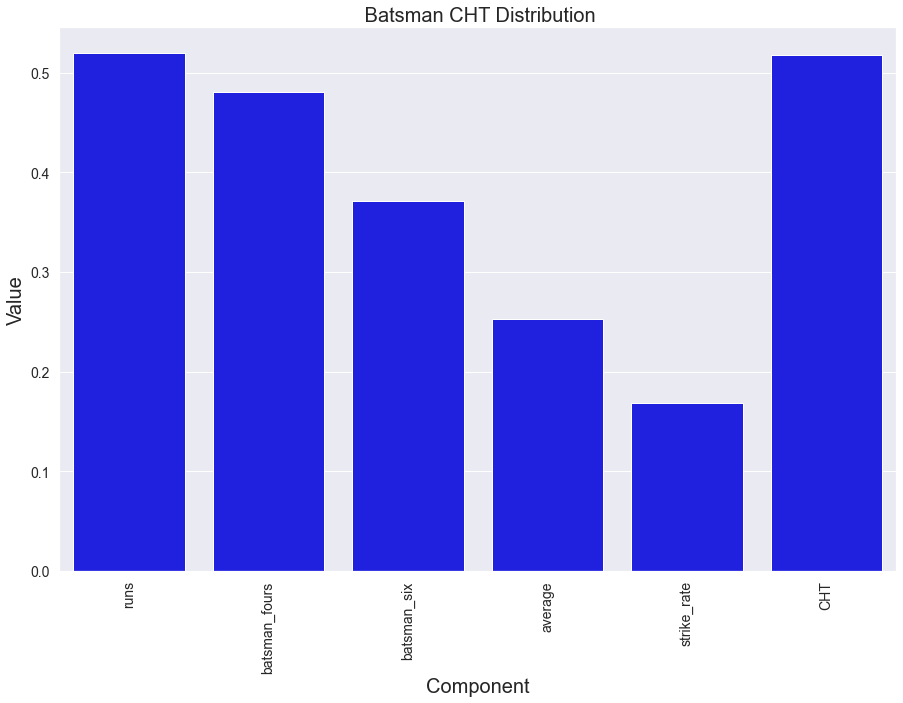

In [106]:

def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["batsman"] = batsman
    sns.barplot( y = 'value', x = 'batsman', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

plot_component_number("PC1")

Y = X_std.dot(matrix_w)

Y

Y_1 = Y.reset_index()


Y_1

Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

df_plot.sort_values(by = 'PC1',ascending = False).head(15)

# PCA 2022

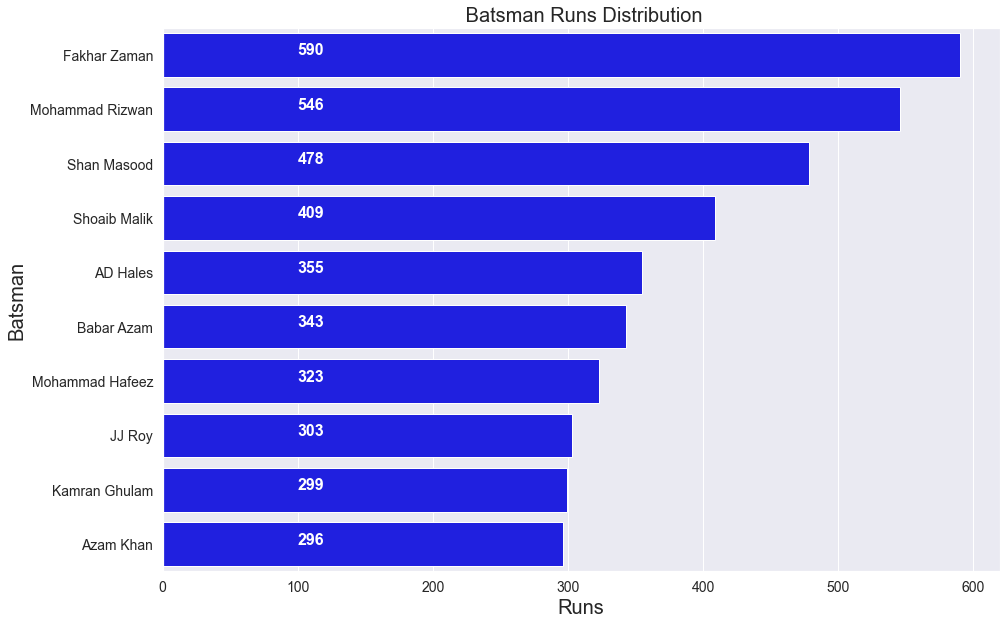

In [123]:
# PCA 2022

# PCA 2022

#TOTAL RUNS 2022

batsman_runs = all_data_2022.groupby(["striker"])["runs_off_bat"].sum()

batsman_runs = batsman_runs.reset_index( name = 'batsman_runs').sort_values( by = 'batsman_runs',ascending = False) 

batsman_runs.head()




import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

xlabel_name = "Runs"
ylabel_name = "Batsman"
title_name = " Batsman Runs Distribution"

sns.barplot( x = "batsman_runs" , y = "striker" , data = batsman_runs.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_runs.head(10)["batsman_runs"].values):
    ax.text(100, i, v,fontsize=16,color='white',weight='bold')







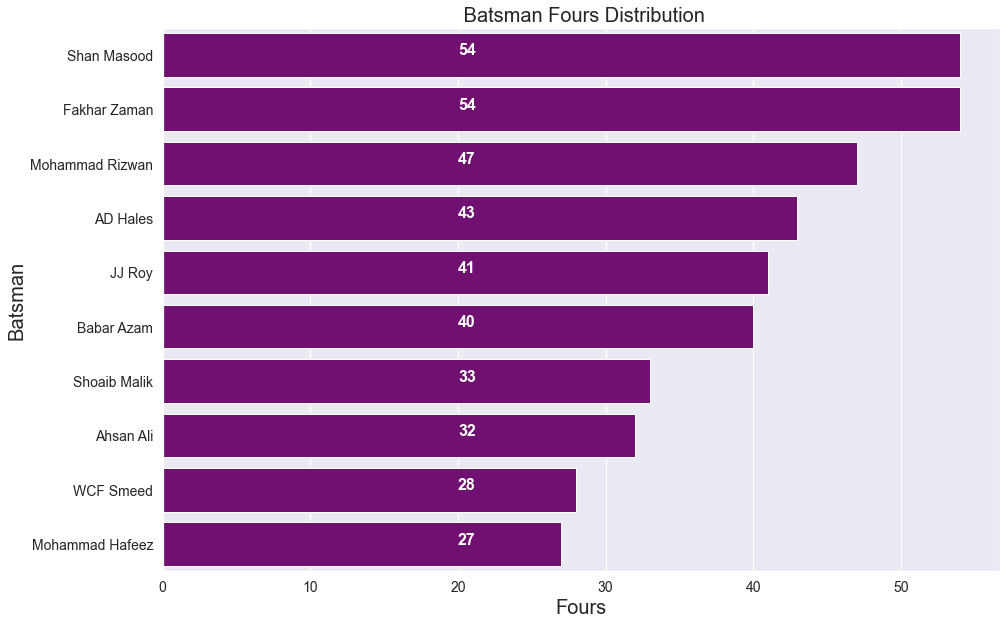

In [124]:
batsman_team = all_data_2022.groupby(['striker'])["batting_team"].unique()\
.reset_index(name = 'batting_team').sort_values( by = 'batting_team',ascending = False)

batsman_team['team'] = [''.join(map(str, l)) for l in batsman_team['batting_team']]
batsman_team.drop("batting_team",axis=1,inplace = True)
batsman_team




# Matches



batsman_matches = all_data_2022[["striker","match_id"]]

batsman_matches_count = batsman_matches.drop_duplicates().groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_matches')

batsman_matches_count

batsman_all_stats = batsman_runs.merge(batsman_matches_count)

batsman_all_stats


# Player Outs



batsman_outs = all_data_2022['player_dismissed'].value_counts(dropna=True)\
.reset_index(name = 'player_out').sort_values( by = 'player_out',ascending = False)
batsman_outs.rename(columns={'index':'striker'},inplace=True)
batsman_outs.drop(index=batsman_outs.index[0], 
        axis=0, 
        inplace=True)

batsman_outs









# Fours

all_data_four_runs = all_data_2022[(all_data_2022["is_four"] == True)]

batsman_fours = all_data_four_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_fours').sort_values( by = 'batsman_fours',ascending = False) 

batsman_fours

xlabel_name = "Fours"
ylabel_name = "Batsman"
title_name = " Batsman Fours Distribution"

sns.barplot( x = "batsman_fours" , y = "striker" , data = batsman_fours.head(10), color = "purple")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_fours.head(10)["batsman_fours"].values):
    ax.text(20, i, v,fontsize=16,color='white',weight='bold')




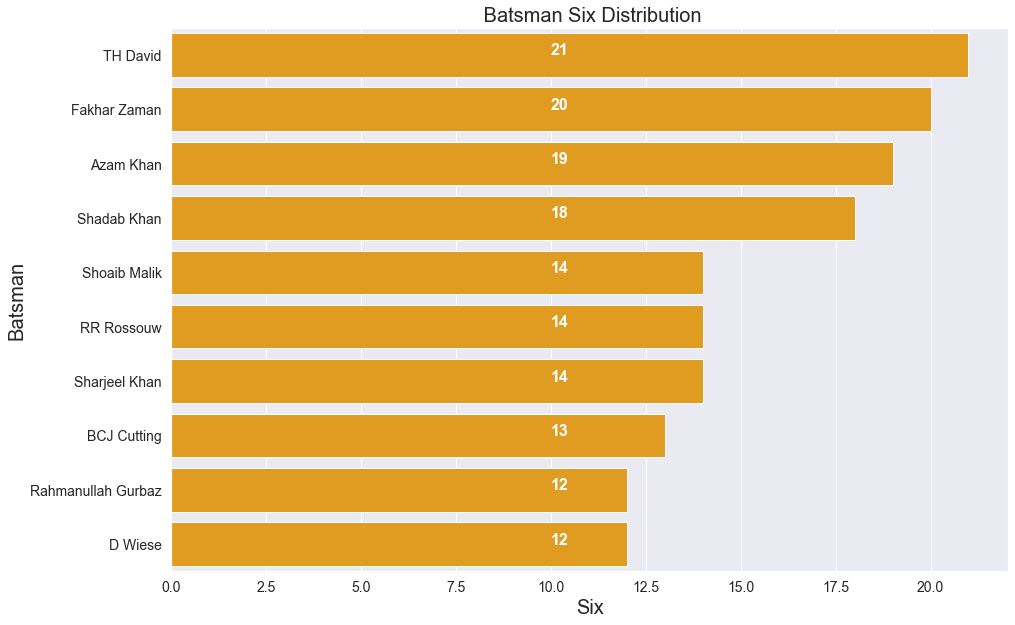

In [125]:

# Six

all_data_six_runs = all_data_2022[(all_data_2022["is_six"] == True)]

batsman_six = all_data_six_runs.groupby(["striker"])["striker"].count() \
.reset_index( name = 'batsman_six').sort_values( by = 'batsman_six',ascending = False) 

batsman_six

xlabel_name = "Six"
ylabel_name = "Batsman"
title_name = " Batsman Six Distribution"

sns.barplot( x = "batsman_six" , y = "striker" , data = batsman_six.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_six.head(10)["batsman_six"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')


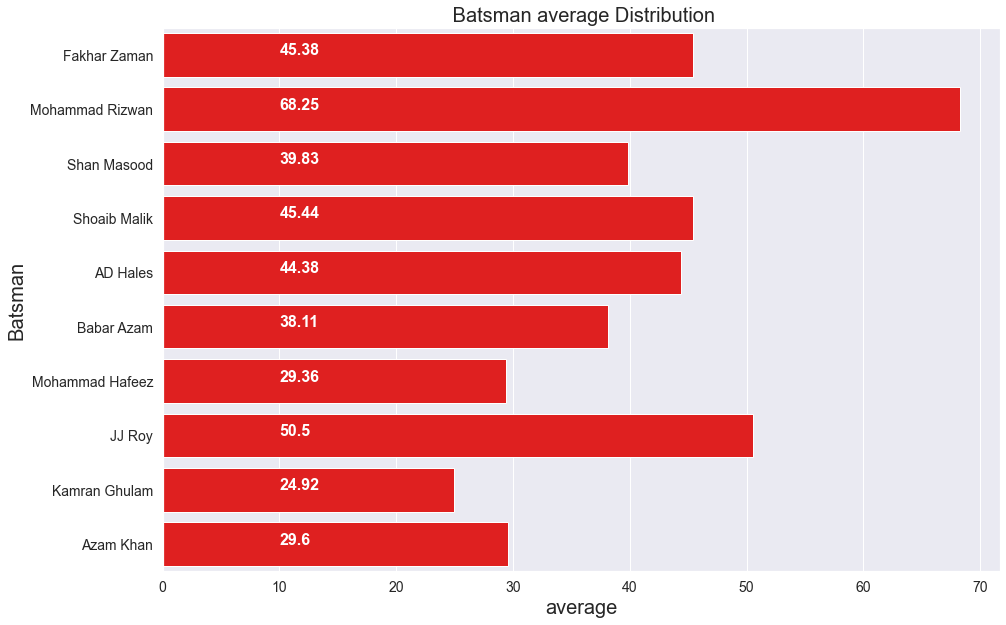

In [126]:

batsman_all_stats = batsman_all_stats.merge(batsman_fours,how = "left")

batsman_all_stats

batsman_all_stats = batsman_all_stats.merge(batsman_six,how = "left")
batsman_all_stats

batsman_all_stats = batsman_all_stats.merge(batsman_team,how="right")
batsman_all_stats = batsman_all_stats.sort_values("batsman_runs",ascending=False)

batsman_all_stats



# Average , Strike Rate


batsman_del = all_data_2022.groupby(["striker"])["is_wide"].apply(lambda x: (x==False).sum())\
.reset_index( name = 'deliveries').sort_values( by = 'deliveries',ascending = False) 



batsman_del

batsman_outs

batsman_all_stats = batsman_all_stats.merge(batsman_del,how = "left")
batsman_all_stats = batsman_all_stats.merge(batsman_outs,how = "left")

batsman_all_stats['player_out'].fillna(1)

batsman_all_stats["average"] = round(batsman_all_stats["batsman_runs"] / batsman_all_stats["player_out"],2)

batsman_all_stats["strike_rate"] =round(batsman_all_stats["batsman_runs"]  / batsman_all_stats["deliveries"] *100,2)

batsman_all_stats

batsman_all_stats.columns

batsman_all_stats_5 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate']]

batsman_all_stats_5.index =batsman_all_stats["striker"]

batsman_all_stats_5 =batsman_all_stats_5.fillna(0)

batsman_all_stats_5

batsman_all_stats_v2 = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="average",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman average Distribution"

sns.barplot( x = "average" , y = "striker" , data = batsman_all_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["average"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')




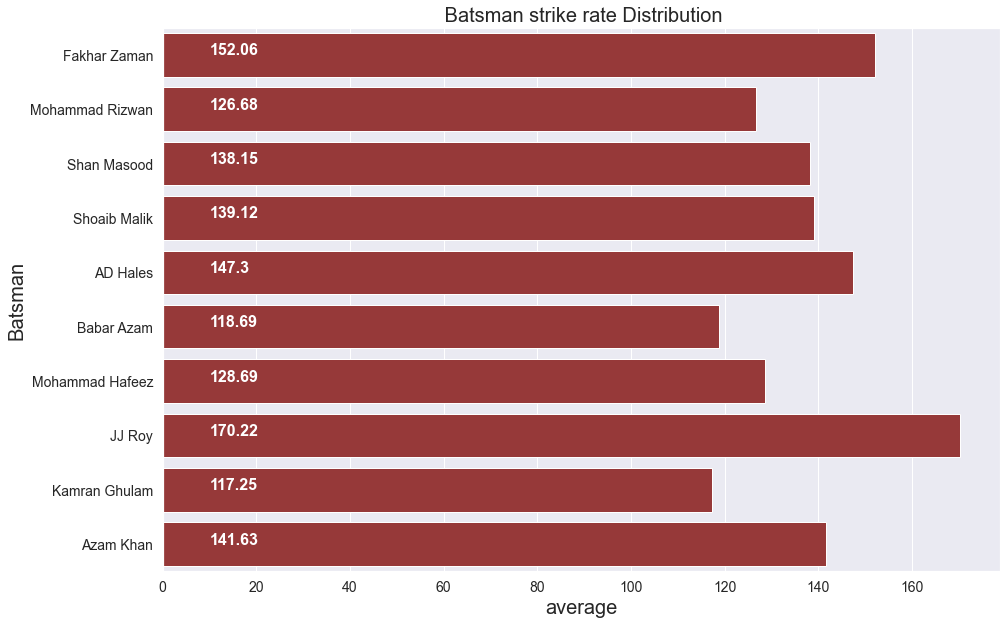

In [128]:


batsman_all_stats_v2 = batsman_all_stats_v2.sort_values(by ="strike_rate",ascending =False)
xlabel_name = "average"
ylabel_name = "Batsman"
title_name = " Batsman strike rate Distribution"

sns.barplot( x = "strike_rate" , y = "striker" , data = batsman_all_stats.head(10), color = "brown")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["strike_rate"].values):
    ax.text(10, i, v,fontsize=16,color='white',weight='bold')




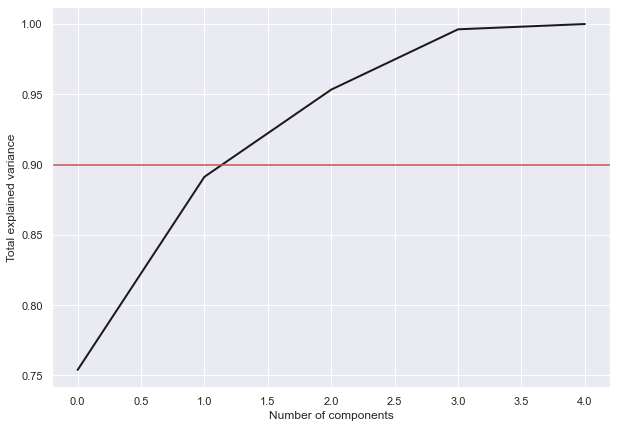

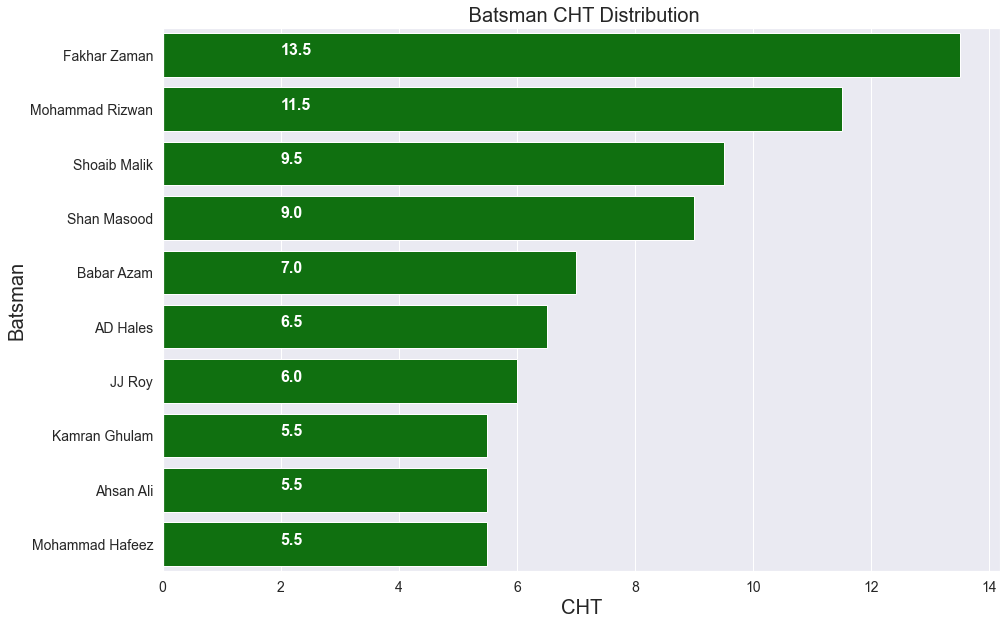

In [129]:
# PCA

from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_5), index=batsman_all_stats_5.index, columns=batsman_all_stats_5.columns)

X

from sklearn.decomposition import PCA

# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5'], index=X.index)
df_plot.head()

df_plot = df_plot.reset_index()

df_plot.sort_values(by = 'PC1',ascending = False).head(10)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()




pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

batsman_thirty = all_data_2022.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_thirty = batsman_thirty.reset_index(name = "thirty")
batsman_thirty

batsman_thirty_players = batsman_thirty[(batsman_thirty["thirty"] >= 30) & 
                                          (batsman_thirty["thirty"] < 50)]

batsman_thirty_players = batsman_thirty_players.groupby("striker")["striker"].count()
batsman_thirty_players

batsman_thirty_players = batsman_thirty_players.reset_index(name = "thirty")

batsman_thirty_players

batsman_fifty = all_data_2022.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_fifty = batsman_fifty.reset_index(name = "fifty")
batsman_fifty_players = batsman_fifty[(batsman_fifty["fifty"] >= 50) & 
                                          (batsman_fifty["fifty"] < 100)]
batsman_fifty_players = batsman_fifty_players.groupby("striker")["striker"].count()
batsman_fifty_players = batsman_fifty_players.reset_index(name = "fifty")

batsman_fifty_players

batsman_century = all_data_2022.groupby(["striker","match_id"])["runs_off_bat"].sum()

batsman_century = batsman_century.reset_index(name = "century")
batsman_century

batsman_century = batsman_century[(batsman_century["century"] >= 100)]

batsman_century = batsman_century.groupby("striker")["striker"].count()
batsman_century = batsman_century.reset_index(name = "century")

batsman_century

batsman_all_stats = batsman_all_stats.merge(batsman_thirty_players,how="left")

batsman_all_stats

batsman_all_stats =batsman_all_stats.merge(batsman_fifty_players,how="left")
batsman_all_stats =batsman_all_stats.merge(batsman_century,how="left")

batsman_all_stats

batsman_all_stats = batsman_all_stats.fillna(0)

batsman_all_stats

batsman_all_stats["CHT"] = 2*batsman_all_stats["century"]+ 1.5*batsman_all_stats["fifty"] + batsman_all_stats["thirty"]






batsman_all_stats.columns

batsman_all_stats = batsman_all_stats.sort_values(by ="CHT",ascending =False)
xlabel_name = "CHT"
ylabel_name = "Batsman"
title_name = " Batsman CHT Distribution"

sns.barplot( x = "CHT" , y = "striker" , data = batsman_all_stats.head(10), color = "green")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(batsman_all_stats.head(10)["CHT"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')



In [130]:


# PCA again

batsman_all_stats = batsman_all_stats[batsman_all_stats["batsman_runs"] >= 100]

batsman_all_stats

batsman_all_stats_6 = batsman_all_stats[['batsman_runs', 'batsman_fours',
       'batsman_six', 'average', 'strike_rate',"CHT"]]

batsman_all_stats_6.index = batsman_all_stats["striker"]

batsman_all_stats_6

from sklearn.preprocessing import scale
X = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

X



,batsman_runs,batsman_fours,batsman_six,average,strike_rate,CHT
striker,,,,,,
Fakhar Zaman,3.116218,2.579457,2.277944,0.950420,0.312778,3.262569
Mohammad Rizwan,2.734908,2.029862,-0.041137,2.624941,-0.746490,2.585276
Shoaib Malik,1.547646,0.930673,1.012991,0.954813,-0.227290,1.907984
Shan Masood,2.145610,2.579457,0.169689,0.544054,-0.267774,1.738660
Babar Azam,0.975681,1.480267,-1.516915,0.418117,-1.079963,1.061367
AD Hales,1.079675,1.715808,0.380514,0.877201,0.114113,0.892044
JJ Roy,0.629035,1.558781,0.169689,1.325301,1.070710,0.722721
Kamran Ghulam,0.594371,0.302564,-0.041137,-0.547643,-1.140064,0.553398
Ahsan Ali,0.169730,0.852159,-0.673613,0.242391,-0.236889,0.553398


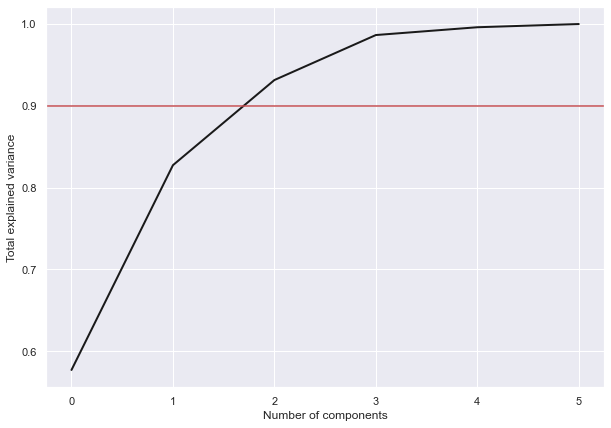

In [131]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index=X.index)
df_plot.head(15)

pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.9, c='r')
plt.show();

df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2"],ascending = False)

df_plot.head(20)

df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by = ["PC1","PC2","PC3"],ascending = False)

df_plot.head(20)

df_plot = df_plot.merge(batsman_team,how="right")
df_plot = df_plot[df_plot['PC1'].notna()]

df_plot.sort_values("PC1",ascending = False)


df_plot.to_csv('batters_pca_2022.csv',index=False)


average_pca_team = pd.DataFrame()

average_pca_team = df_plot.groupby('team', as_index=False)['PC1'].mean()

average_pca_team

average_pca_team.to_csv('PCA_2022_Batsman.csv', index=False)


In [616]:

# covariance matrix

X_std = pd.DataFrame(scale(batsman_all_stats_6), index=batsman_all_stats_6.index, columns=batsman_all_stats_6.columns)

X_std

X_std["batsman_runs"].mean() , X_std["batsman_runs"].std() 

cov_mat = np.cov(X_std.T)
cov_mat

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

eig_pairs[0]

eig_pairs[0][1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1) ,
                      eig_pairs[2][1].reshape(6,1) ,
                      eig_pairs[3][1].reshape(6,1),
                      eig_pairs[4][1].reshape(6,1),
                      eig_pairs[5][1].reshape(6,1)
                     
                     ))



Eigenvectors 
[[-0.51956045 -0.11119402  0.22030494 -0.03176482 -0.81353756  0.07941159]
 [-0.48254463 -0.22211677  0.12629296  0.51498709  0.29490246 -0.59134232]
 [-0.27851276  0.59262598  0.40658342 -0.53765428  0.2009758  -0.27649884]
 [-0.38239216  0.05355098 -0.85517125 -0.30773536  0.0019306  -0.15775262]
 [-0.07525351  0.74972301 -0.17057408  0.59135269 -0.1035114   0.20674666]
 [-0.51744701 -0.14880245  0.09895638 -0.01755293  0.44730255  0.70705472]]

Eigenvalues 
[3.54964654 1.53926813 0.64000145 0.3383344  0.02416438 0.05858511]
Eigenvalues in descending order:
3.5496465353192113
1.5392681285257925
0.6400014544915091
0.3383343998199295
0.05858510598268621
0.02416437586087166


Matrix W:
 [[-0.51956045 -0.11119402  0.22030494 -0.03176482  0.07941159 -0.81353756]
 [-0.48254463 -0.22211677  0.12629296  0.51498709 -0.59134232  0.29490246]
 [-0.27851276  0.59262598  0.40658342 -0.53765428 -0.27649884  0.2009758 ]
 [-0.38239216  0.05355098 -0.85517125 -0.30773536 -0.15775262  0.0019306 ]
 [-0.07525351  0.74972301 -0.17057408  0.59135269  0.20674666 -0.1035114 ]
 [-0.51744701 -0.14880245  0.09895638 -0.01755293  0.70705472  0.44730255]]


,index,striker,PC1,PC2,PC3,PC4,PC5,PC6,team
67,0.0,Fakhar Zaman,5.573380,0.230438,-1.395188,0.160129,-0.313823,-0.112153,Lahore Qalandars
42,1.0,Mohammad Rizwan,4.674316,-1.583138,1.019467,0.314009,-0.287721,0.395868,Multan Sultans
53,3.0,Shan Masood,3.494293,-1.141296,-0.619916,-0.812706,0.313734,0.144268,Multan Sultans
28,2.0,Shoaib Malik,2.870607,-0.181668,-0.281405,0.576244,-0.443897,-0.097792,Peshawar Zalmi
94,5.0,AD Hales,2.300496,-0.275870,0.072085,-0.426616,0.518167,-0.093009,Islamabad United
9,6.0,JJ Roy,2.087593,0.450550,0.840042,-0.904176,0.395440,-0.197051,Quetta Gladiators
73,4.0,Babar Azam,1.426555,-2.281462,0.283176,-0.760963,-0.082768,0.074734,Karachi Kings
47,19.0,TH David,1.248720,3.030608,-0.283278,0.332867,0.224393,0.055830,Multan Sultans
68,11.0,HC Brook,1.207726,0.980842,1.215493,-0.009585,-0.082884,0.073915,Lahore Qalandars
51,12.0,RR Rossouw,1.005523,1.208476,0.039550,-0.010356,0.156626,0.024348,Multan Sultans


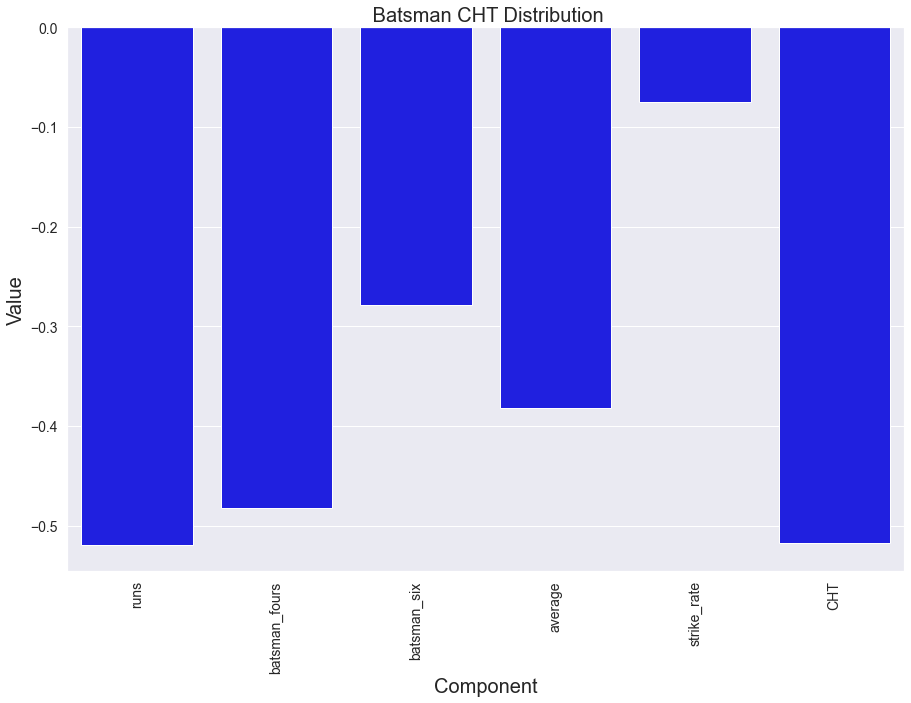

In [617]:
print('Matrix W:\n', matrix_w)

w_df = pd.DataFrame(matrix_w)

w_df

w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4', 4: 'PC5', 5: 'PC6'}, inplace = True)

w_df

batsman = ["runs","batsman_fours","batsman_six","average","strike_rate","CHT"]

component_number = "PC1"

components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["batsman"] = batsman



def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["batsman"] = batsman
    sns.barplot( y = 'value', x = 'batsman', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

plot_component_number("PC1")

Y = X_std.dot(matrix_w)

Y

Y_1 = Y.reset_index()


Y_1

Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

df_plot.sort_values(by = 'PC1',ascending = False).head(15)